In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# IMPORT FINAL DATA FILES
THT_df = pd.read_csv('/content/gdrive/My Drive/ECE 225A Project (Walkability)/data/ABSOLUTE _FINAL_DATA_SET.csv')


<ipython-input-7-354de2f551df>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


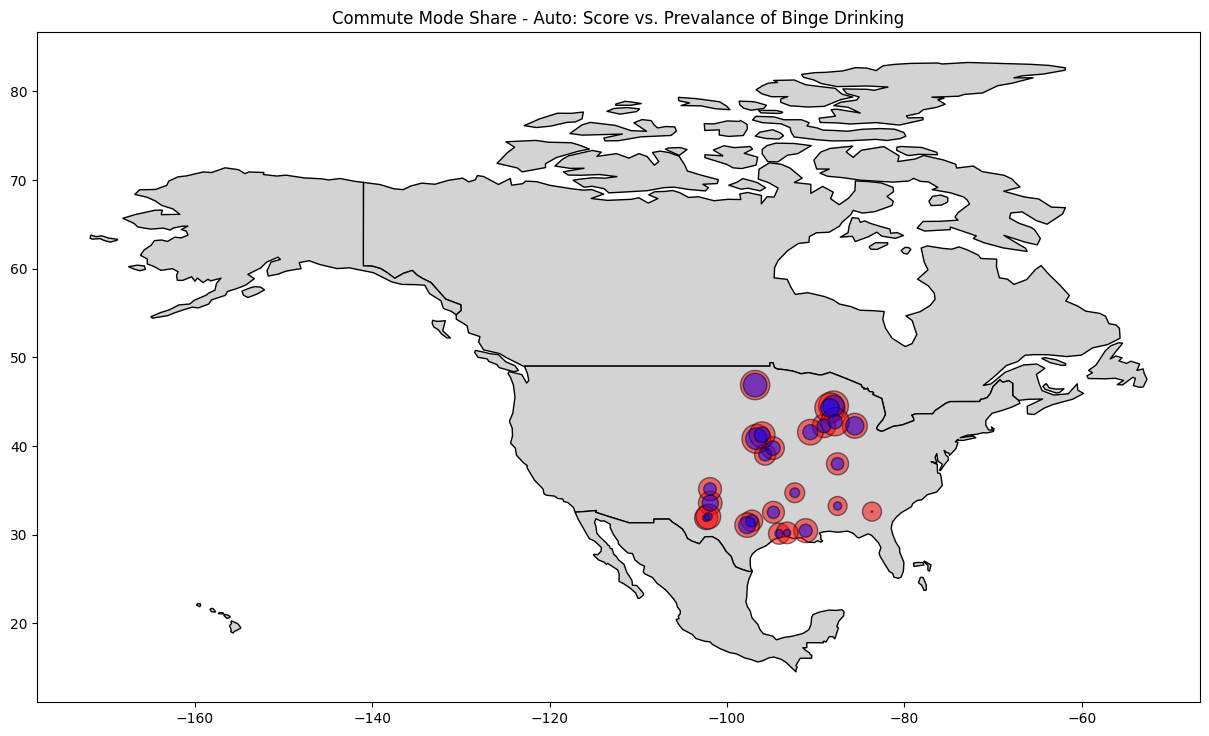

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


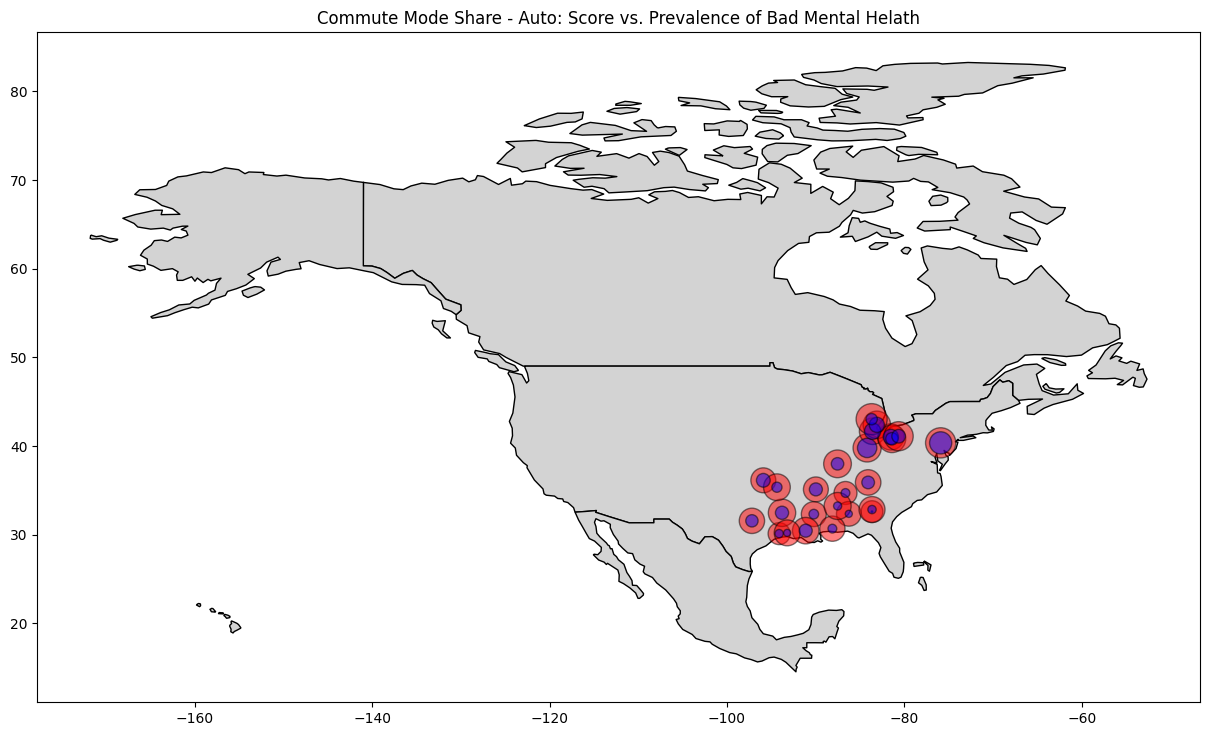

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


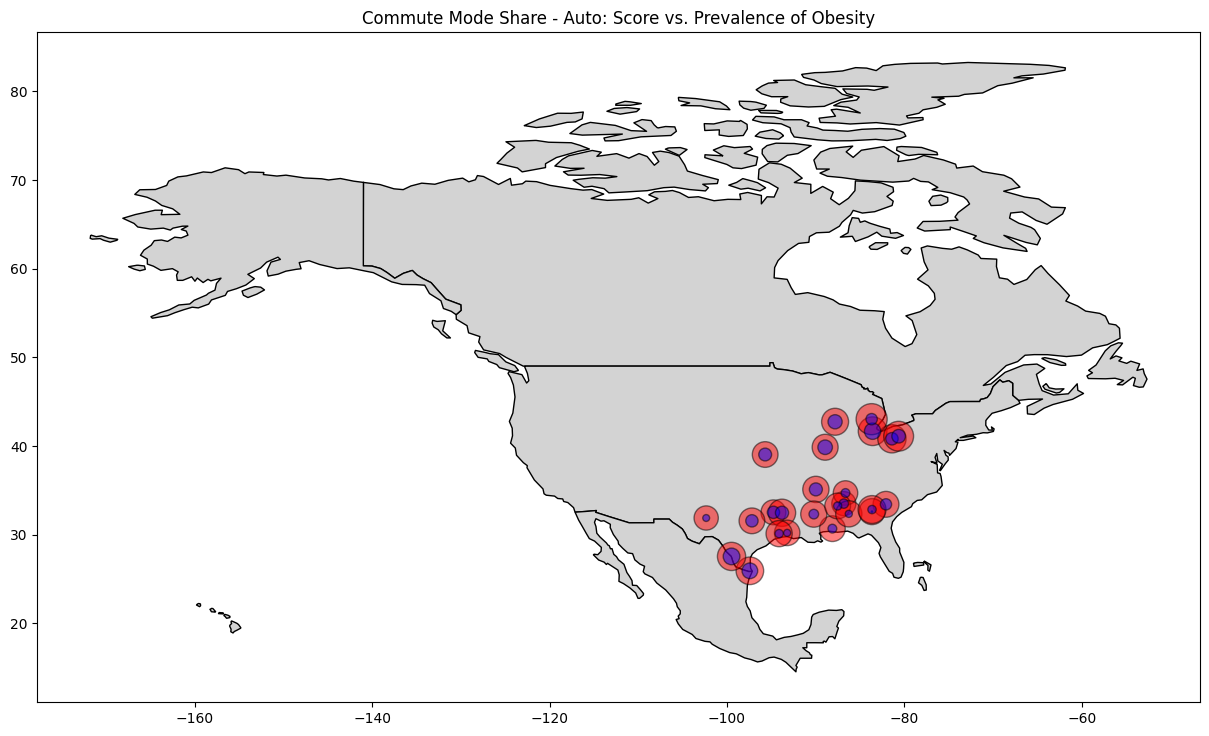

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


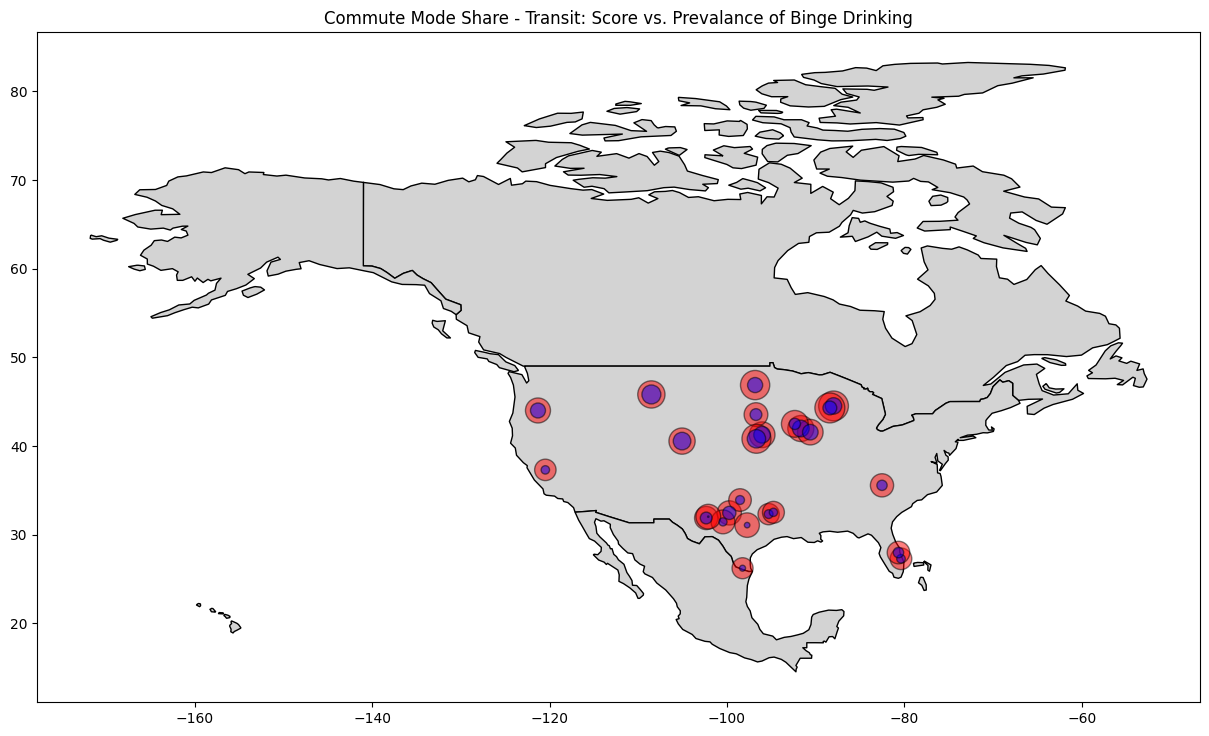

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


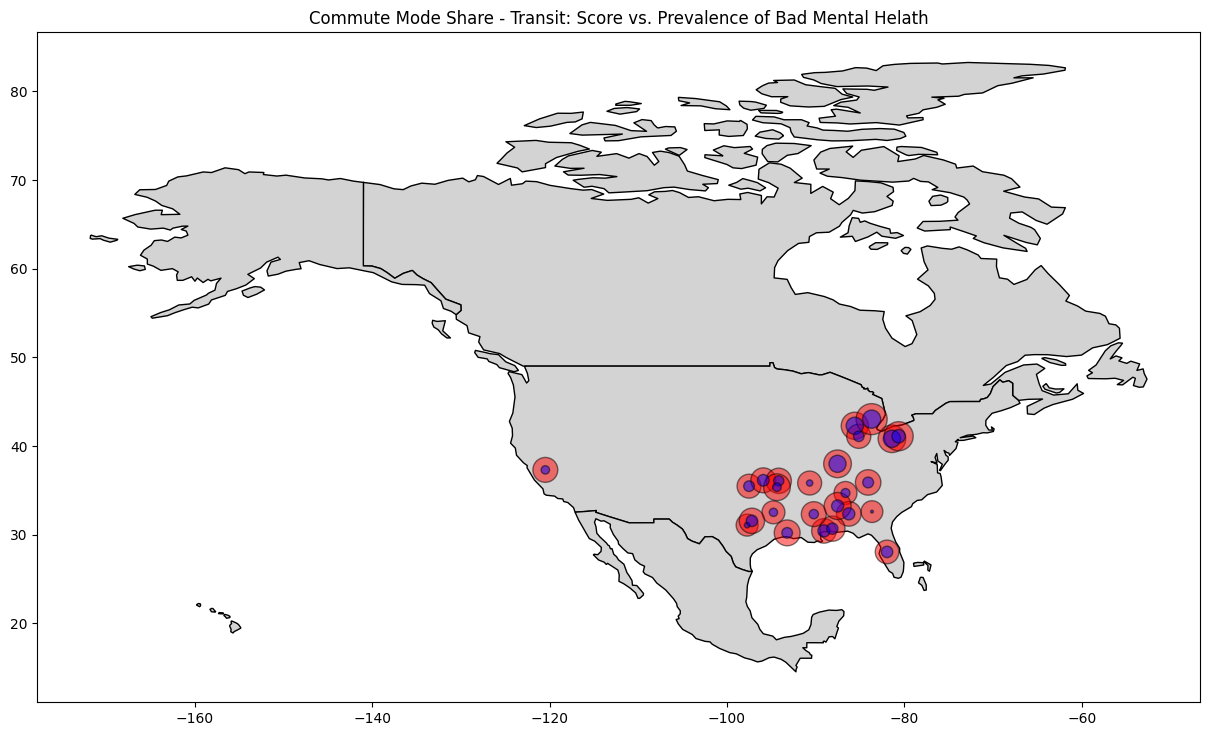

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


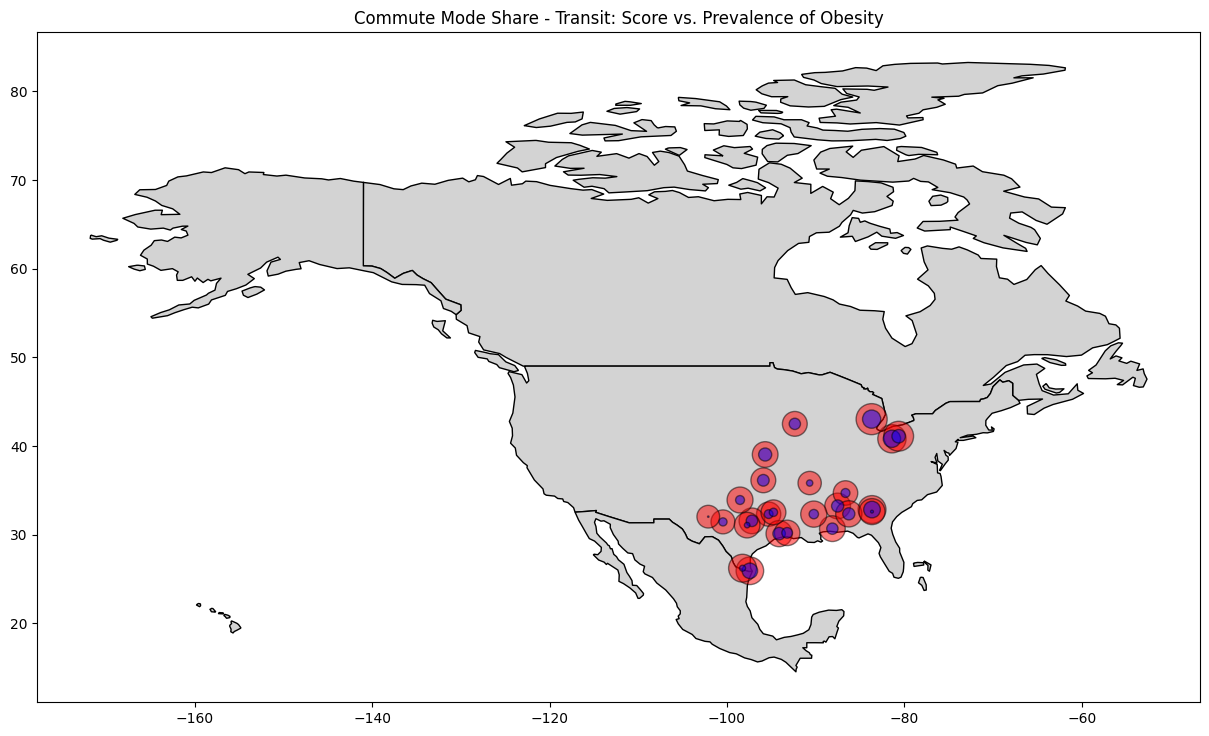

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


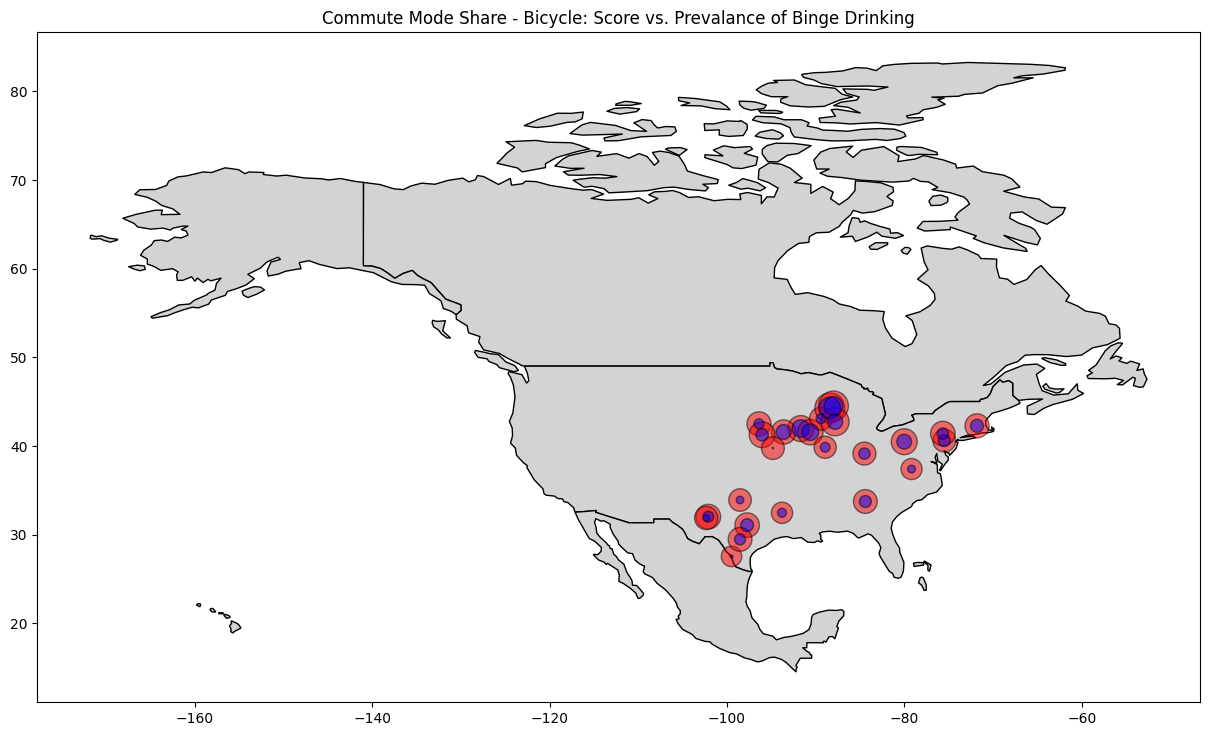

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


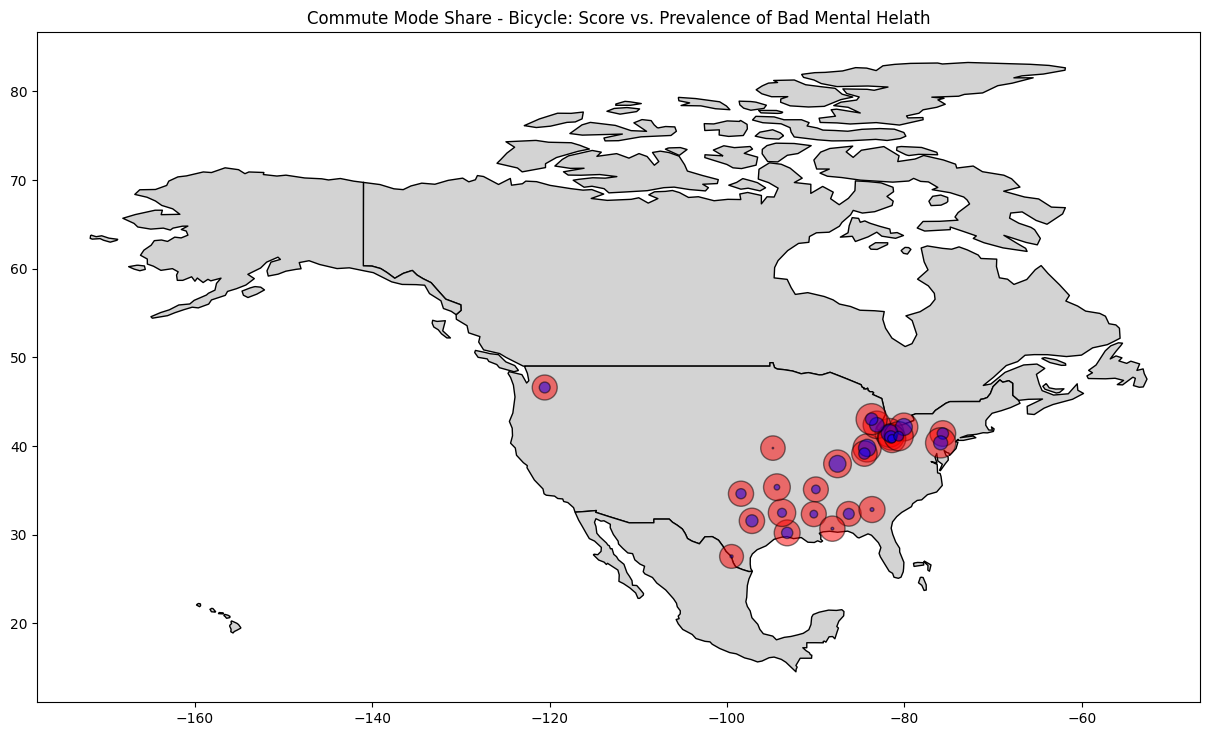

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


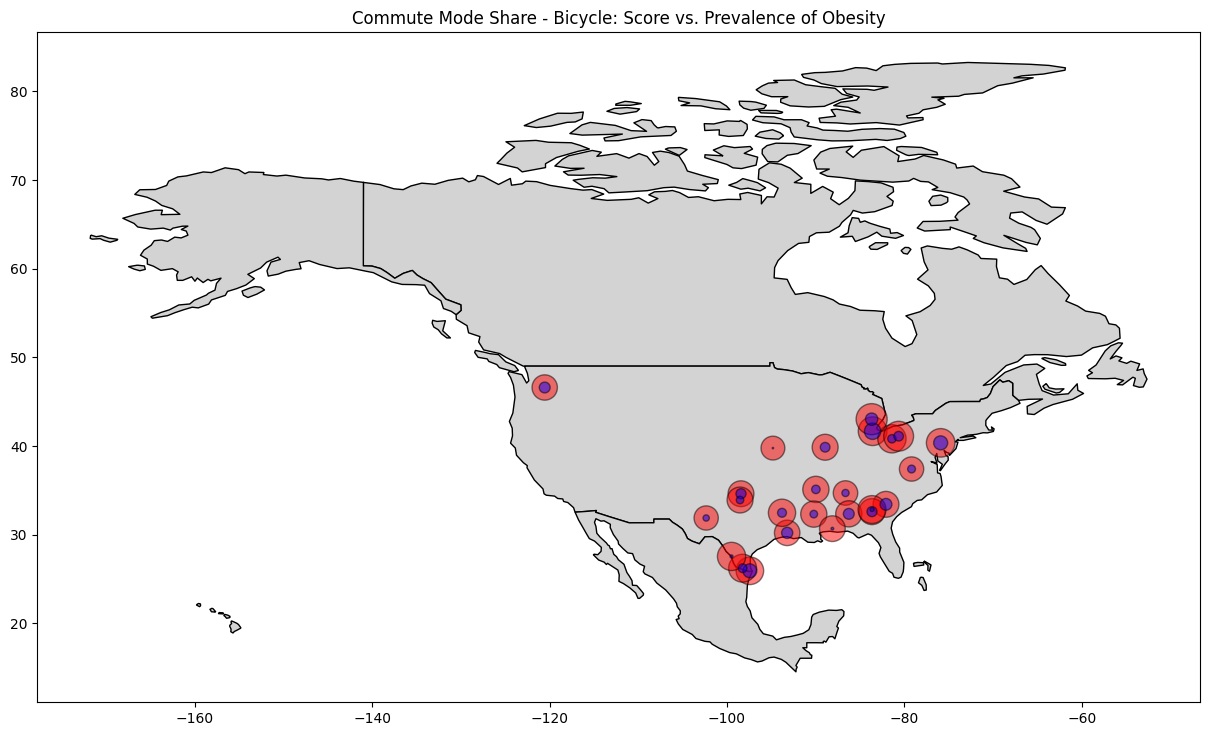

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


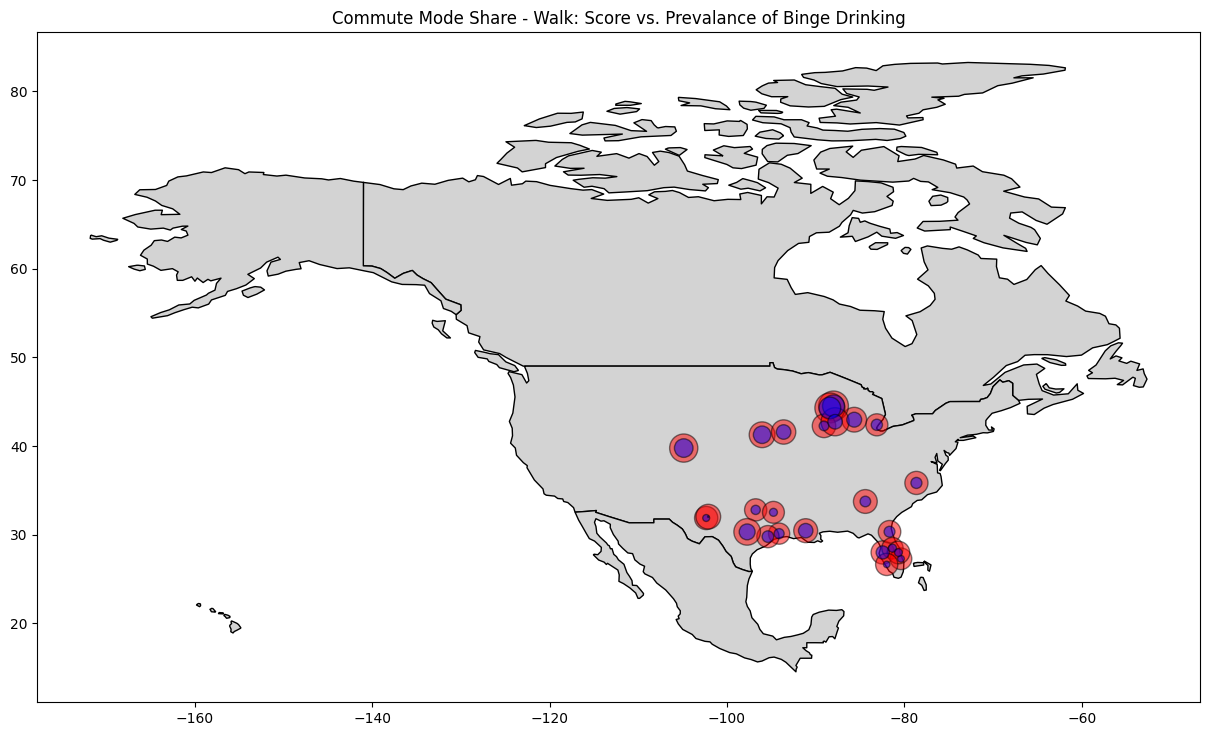

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


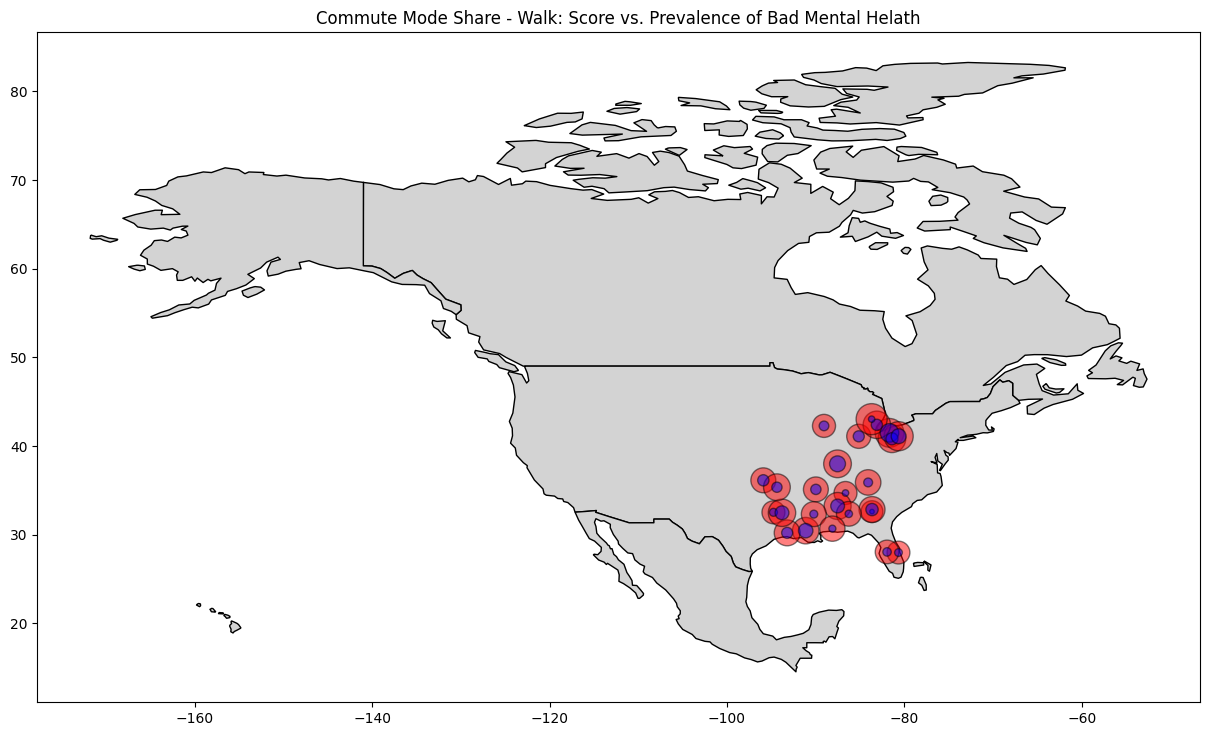

<ipython-input-7-354de2f551df>:32: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


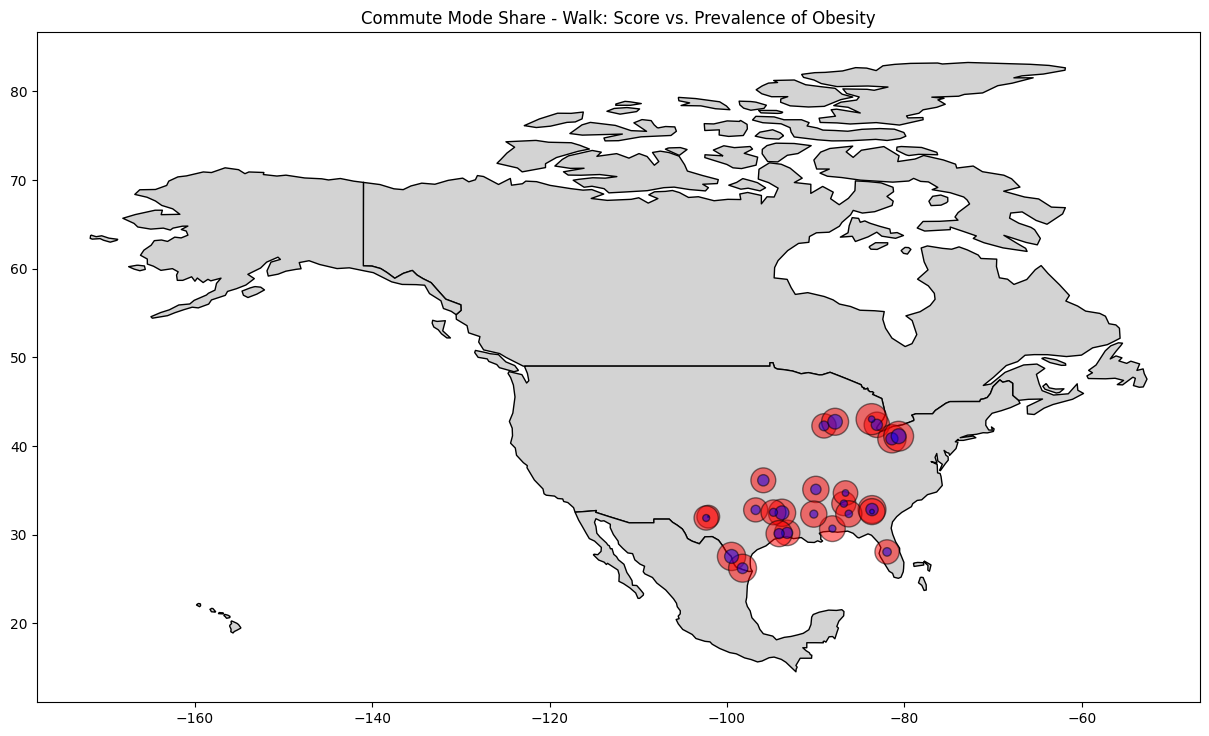

In [ ]:
## GEO SPATIAL VISUALIZATION - LARGEST DISPARITES

scores = ['Commute Mode Share - Auto: Score', 'Commute Mode Share - Transit: Score', 'Commute Mode Share - Bicycle: Score', 'Commute Mode Share - Walk: Score']
healths = ['Binge_data', 'MH_Data', 'obesity_data']
health_graph = {'Binge_data': 'Prevalance of Binge Drinking', 'MH_Data':'Prevalence of Bad Mental Helath', 'obesity_data': 'Prevalence of Obesity'}

# Symbol Sizes
min_size = 1  # Minimum symbol size
max_size = 500  # Maximum symbol size

# World map set up
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
min_lon, max_lon = -100, -60  # For North America
min_lat, max_lat = 24, 50     # For North America
cropped_world = world.cx[min_lon:max_lon, min_lat:max_lat]

for score in scores:
    for health in healths:
        map_df = THT_df.dropna()
        map_df['normalized_health'] = (np.array(THT_df[health]).astype(float) - float(min(THT_df[health]))) / (float(max(THT_df[health])) - float(min(THT_df[health])))
        map_df['normalized_score'] = (np.array(THT_df[score]).astype(float) - float(min(THT_df[score]))) / (float(max(THT_df[score])) - float(min(THT_df[score])))
        map_df['dispair'] =  map_df['normalized_health'] - map_df['normalized_score']
        sorted_map_df = map_df.sort_values(by='dispair')
        to_plot_df = sorted_map_df.tail(25)

        symbol_sizes_health = min_size + (max_size - min_size) * to_plot_df['normalized_health']
        symbol_sizes_score = min_size + (max_size - min_size) * to_plot_df['normalized_score']

        cities = gpd.GeoDataFrame(to_plot_df)
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_aspect('equal')
        cropped_world.plot(ax=ax, color='lightgray', edgecolor='black')
        cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])

        cities.plot(ax=ax, marker='o', color='red', markersize=symbol_sizes_health, alpha=0.5, edgecolor='black')
        cities.plot(ax=ax, marker='o', color='blue', markersize=symbol_sizes_score, alpha=0.5, edgecolor='black')

        plt.title(f'{score} vs. {health_graph[health]}')
        plt.show()





<ipython-input-5-930438c93daf>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-5-930438c93daf>:33: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])


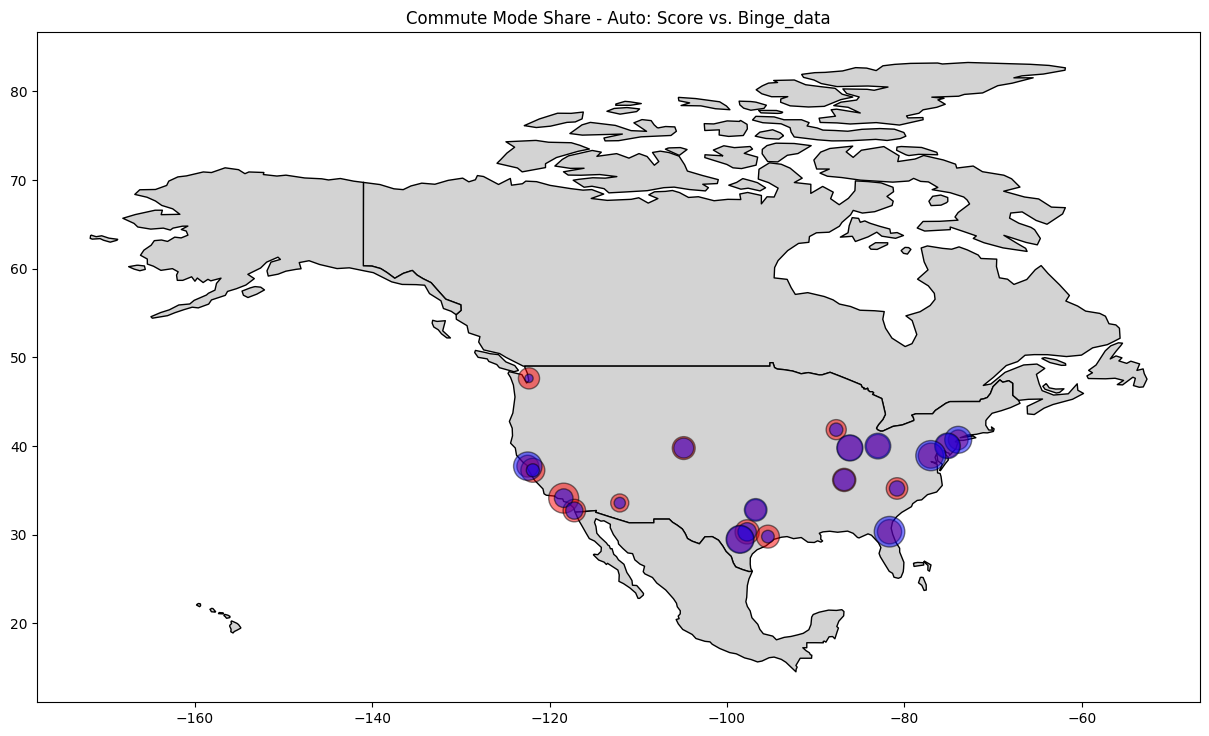

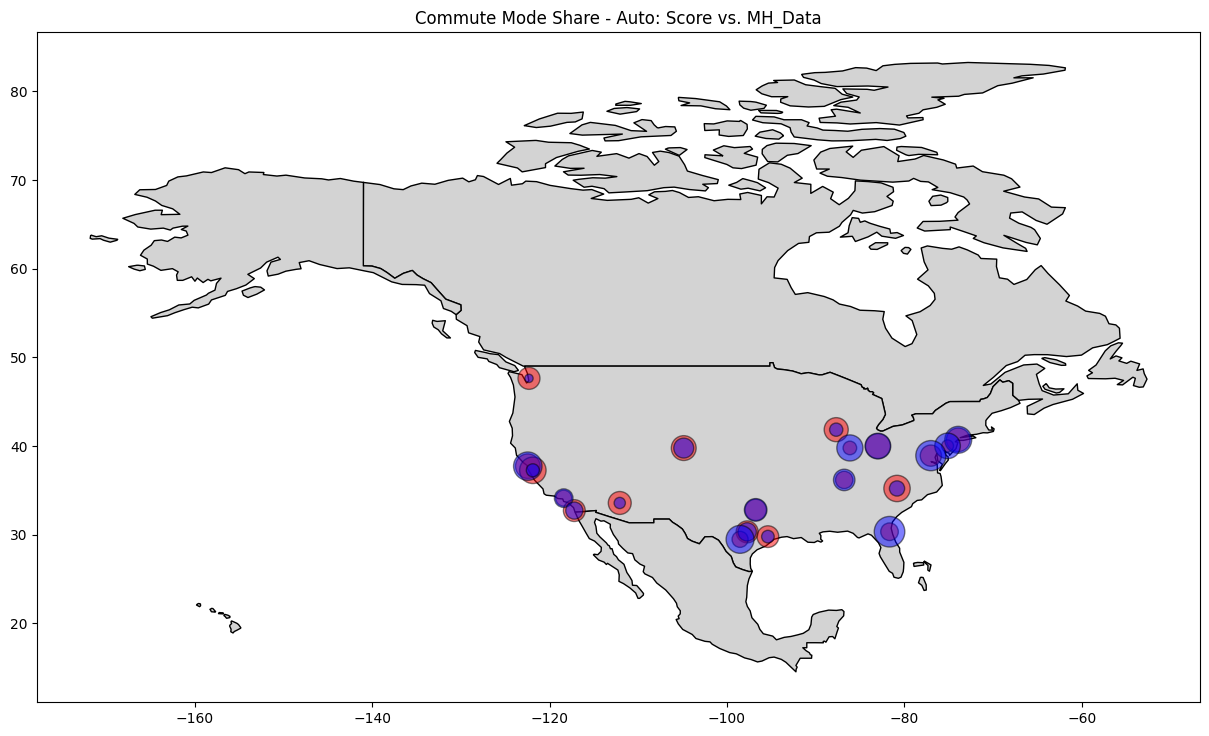

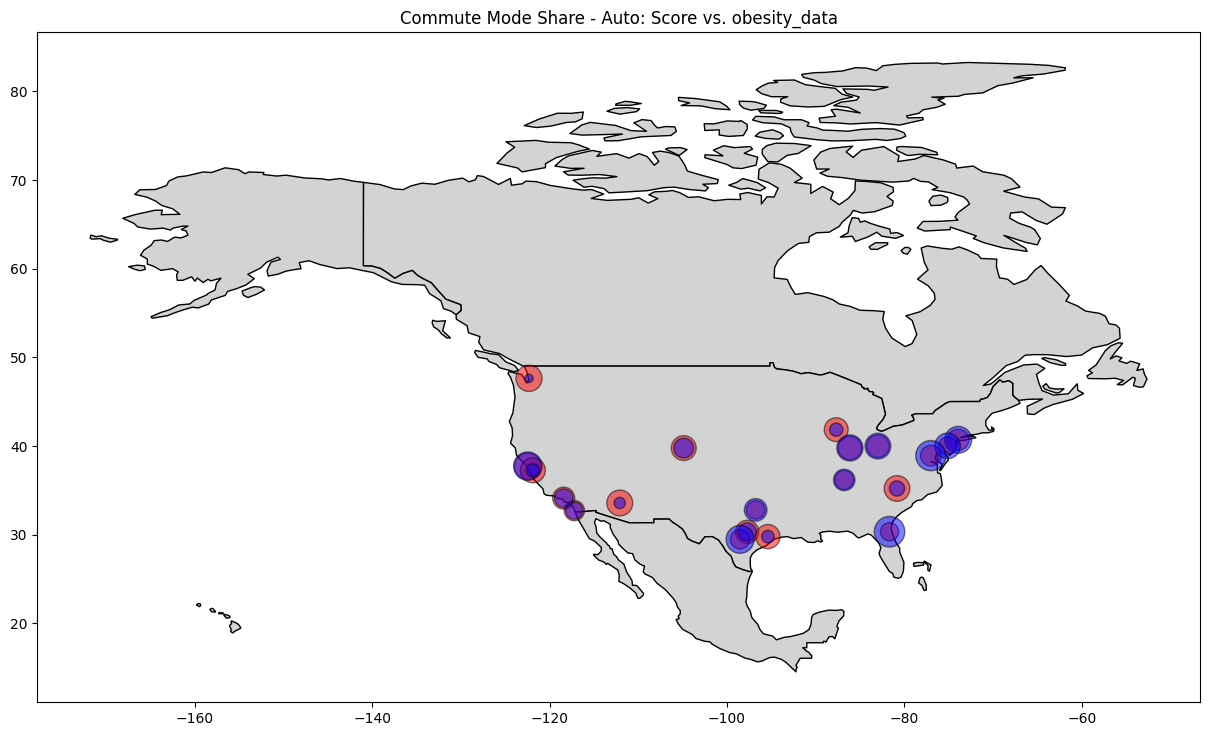

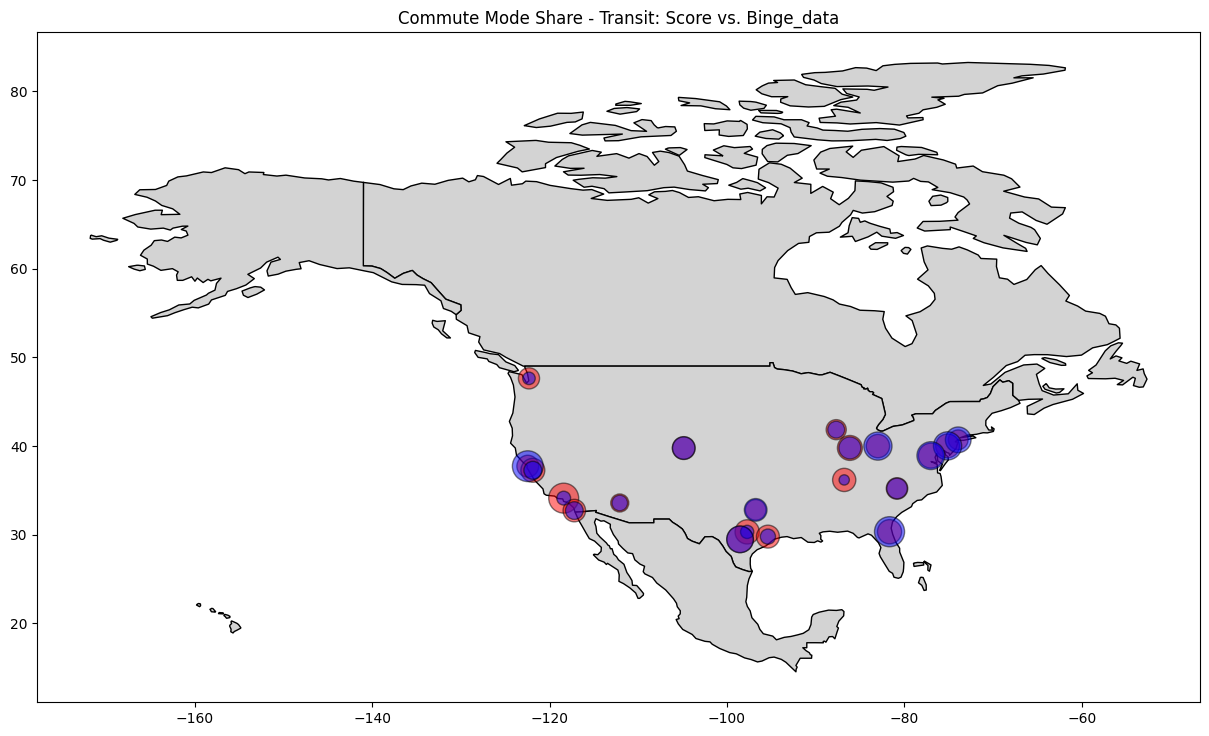

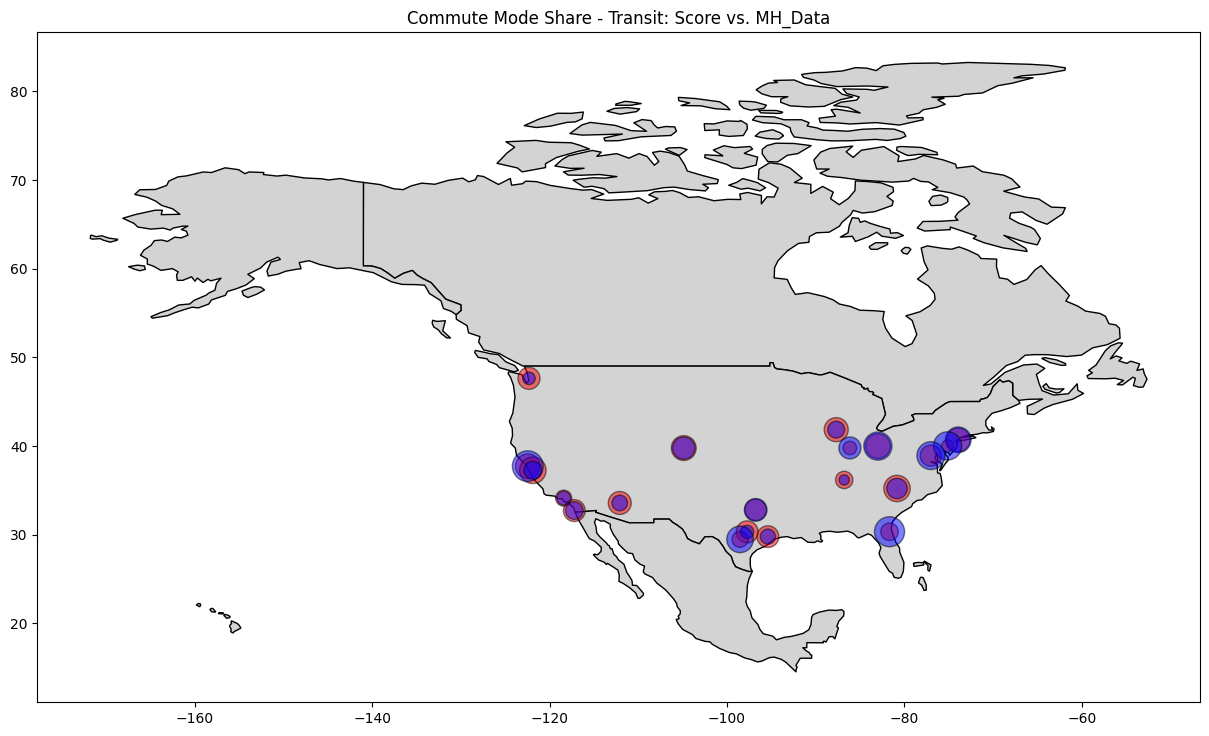

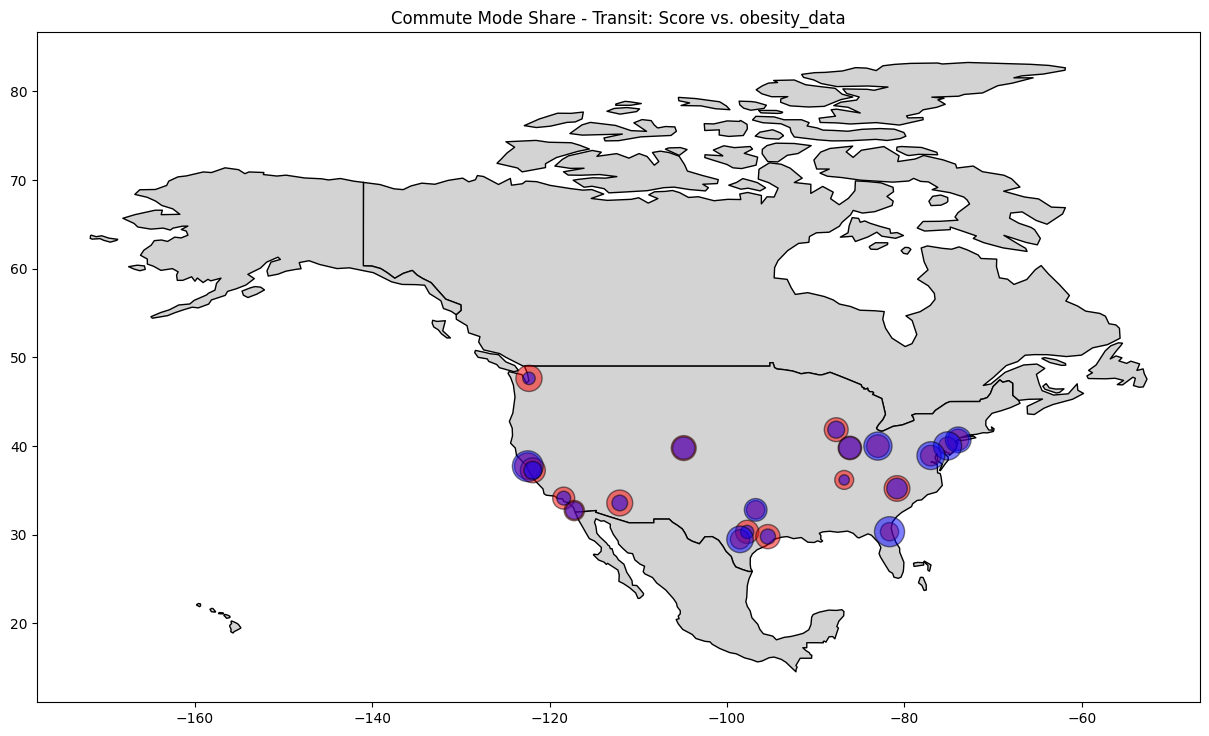

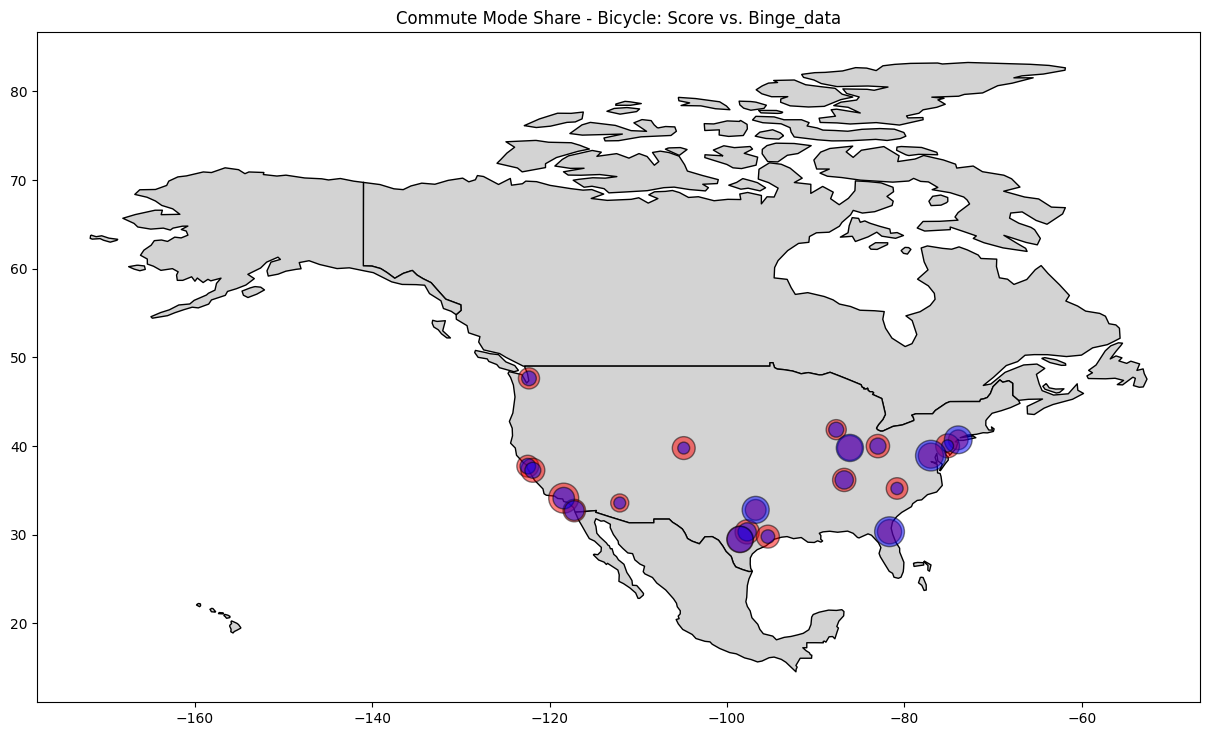

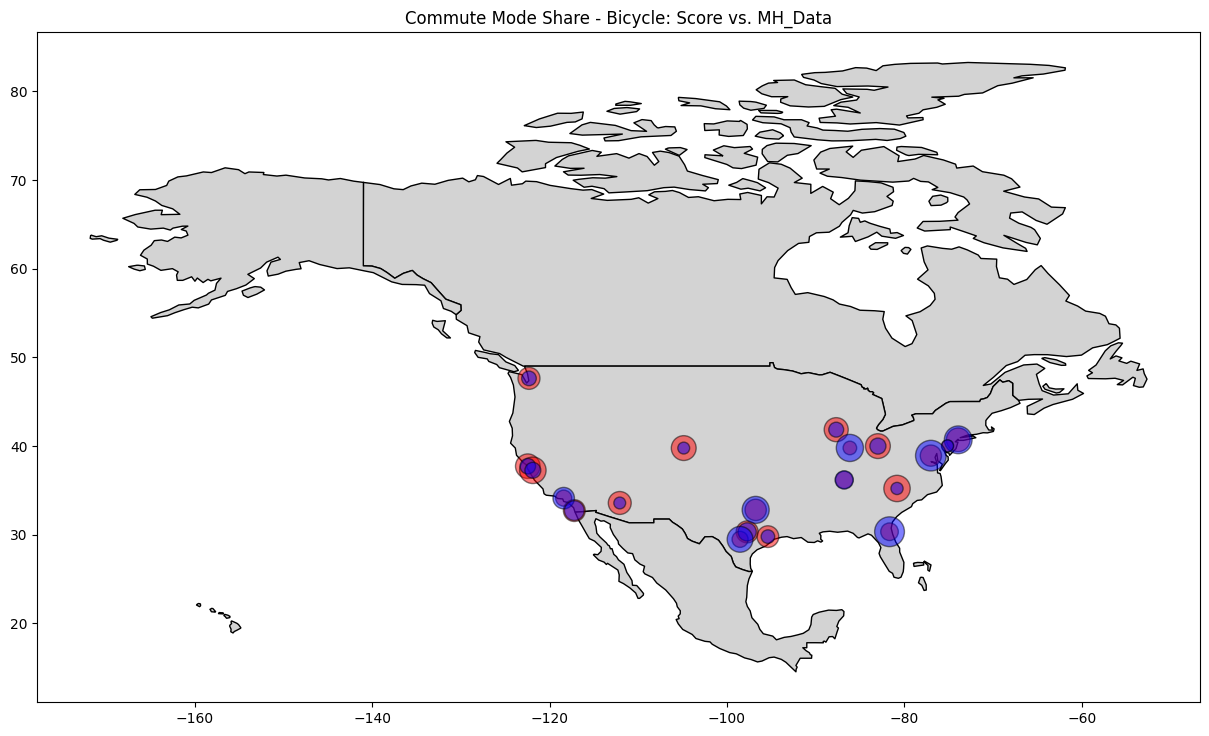

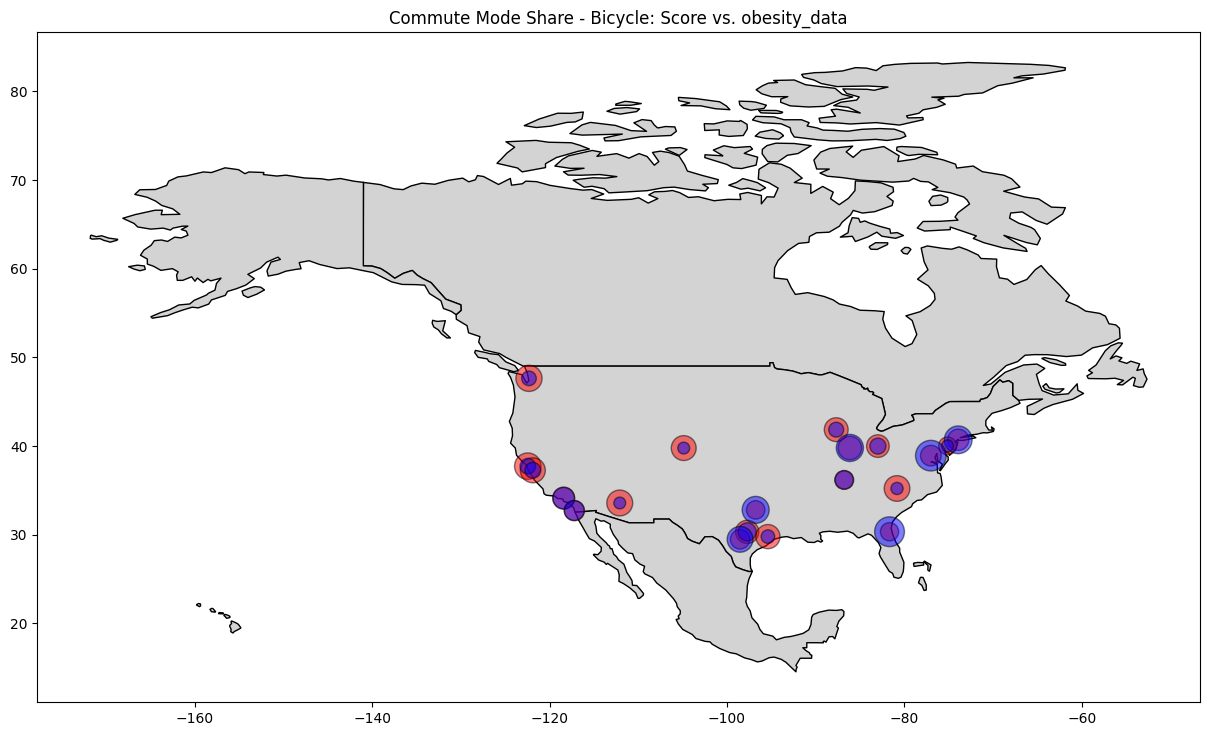

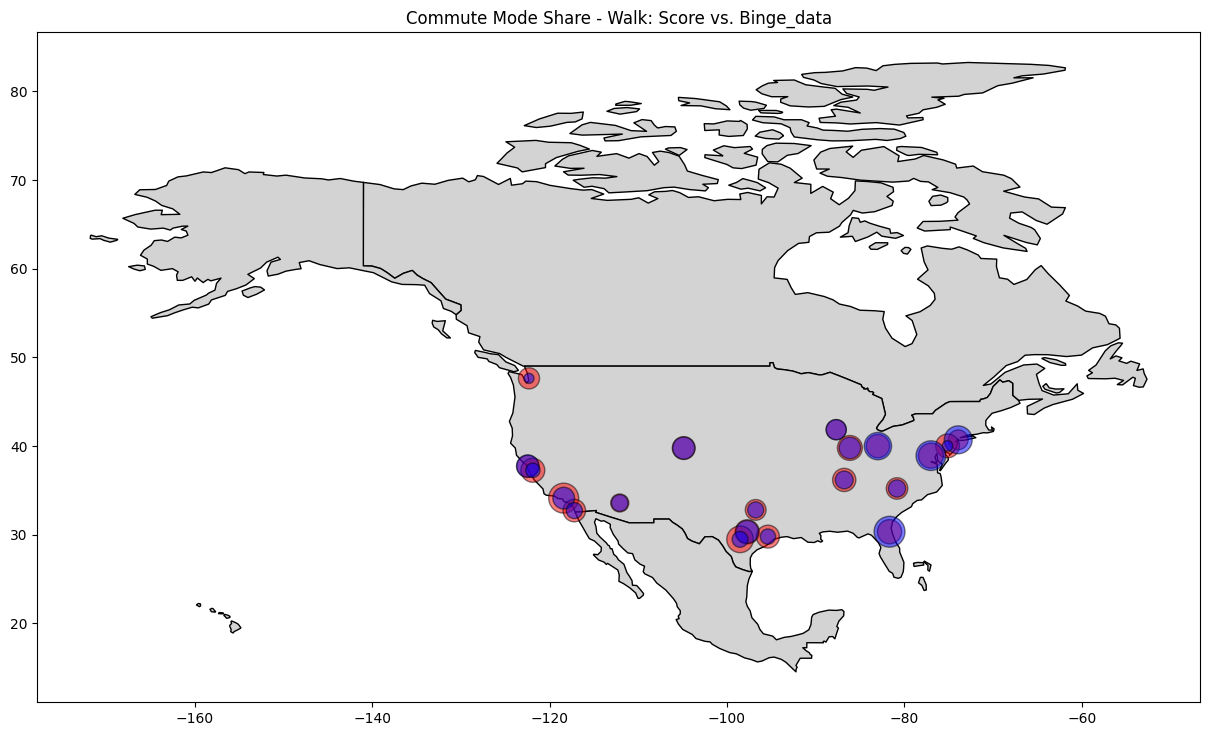

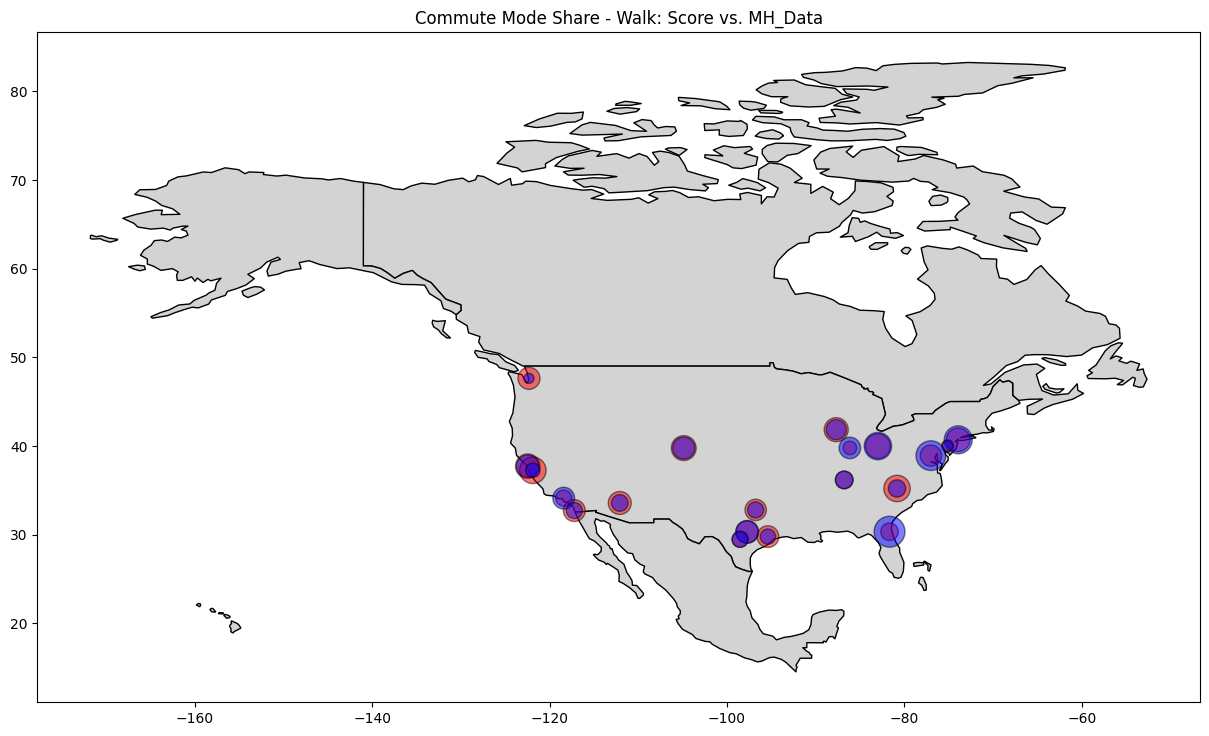

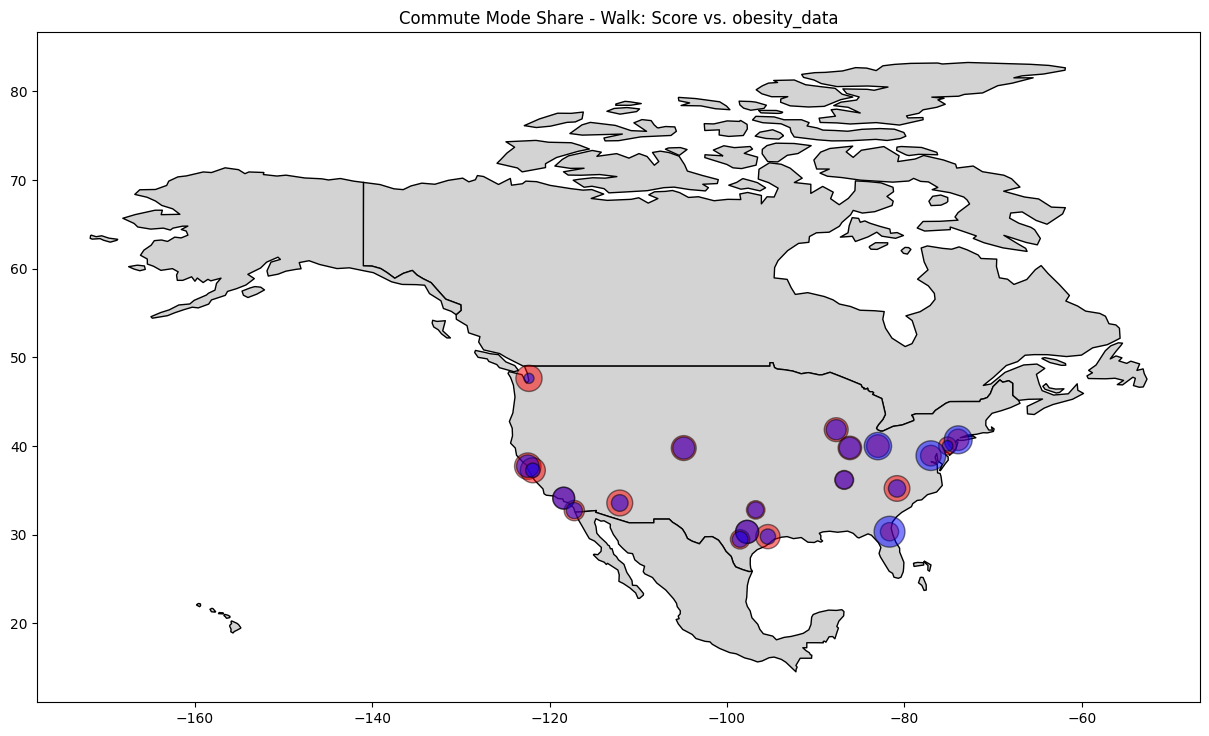

In [ ]:
## GEO SPATIAL VISUALIZATION: Maximum Populations

scores = ['Commute Mode Share - Auto: Score', 'Commute Mode Share - Transit: Score', 'Commute Mode Share - Bicycle: Score', 'Commute Mode Share - Walk: Score']
health = ['Binge_data', 'MH_Data', 'obesity_data']

maxpops = ['New York-Newark-Jersey City, NY-NJ-PA', 'Los Angeles-Long Beach-Anaheim, CA', 'Chicago-Naperville-Elgin, IL-IN-WI', 'Houston-The Woodlands-Sugar Land, TX',
           'Phoenix-Mesa-Scottsdale, AZ', 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD', 'San Antonio-New Braunfels, TX',  'San Diego-Carlsbad, CA', 'Dallas-Fort Worth-Arlington, TX',
           'San Jose-Sunnyvale-Santa Clara, CA', 'Austin-Round Rock, TX', 'Jacksonville, FL', 'Columbus, OH', 'Charlotte-Concord-Gastonia, NC-SC', 'Indianapolis-Carmel-Anderson, IN',
           'San Francisco-Oakland-Hayward, CA', 'Seattle-Tacoma-Bellevue, WA', 'Denver-Aurora-Lakewood, CO', 'Washington-Arlington-Alexandria, DC-VA-MD-WV', 'Washington-Arlington-Alexandria, DC-VA-MD-WV',
           'Nashville-Davidson--Murfreesboro--Franklin, TN']

map_df = THT_df[THT_df['Metropolitan Statistical Area'].isin(maxpops)]
cities = gpd.GeoDataFrame(map_df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
min_lon, max_lon = -130, -60  #For North America
min_lat, max_lat = 24, 50     #For North AMerica

# Filter the world dataset based on the bounding box
cropped_world = world.cx[min_lon:max_lon, min_lat:max_lat]

for score in scores:
    for value in health:
    # values = 'Commute Mode Share - Transit: Score'
    # Set up the map with an explicit aspect ratio
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_aspect('equal')

        # Plot the cropped world map
        cropped_world.plot(ax=ax, color='lightgray', edgecolor='black')

        # # You may need to set the geometry explicitly, assuming 'Lat' and 'Lon' are latitude and longitude columns
        cities['geometry'] = gpd.points_from_xy(cities['Long'], cities['Lat'])

        # # Plot proportional symbols
        min_size = 1  # Minimum symbol size
        max_size = 500  # Maximum symbol size

        # # Normalize the population values for symbol size
        # normalized_population = (np.array(cities[values]).astype(float) - float(min(cities[values]))) / (float(max(cities[values])) - float(min(cities[values])))
        normalized_health = (np.array(THT_df[value]).astype(float) - float(min(THT_df[value]))) / (float(max(THT_df[value])) - float(min(THT_df[value])))
        normalized_score = (np.array(THT_df[score]).astype(float) - float(min(THT_df[score]))) / (float(max(THT_df[score])) - float(min(THT_df[score])))

        # # Calculate symbol sizes based on the normalized population
        symbol_sizes_health = min_size + (max_size - min_size) * normalized_health
        symbol_sizes_score = min_size + (max_size - min_size) * normalized_score
        # print(symbol_sizes)

        # # Plot proportional symbols
        cities.plot(ax=ax, marker='o', color='red', markersize=symbol_sizes_health, alpha=0.5, edgecolor='black')
        cities.plot(ax=ax, marker='o', color='blue', markersize=symbol_sizes_score, alpha=0.5, edgecolor='black')



        # # Set plot title and show the plot
        plt.title(f'{score} vs. {value}')
        plt.show()


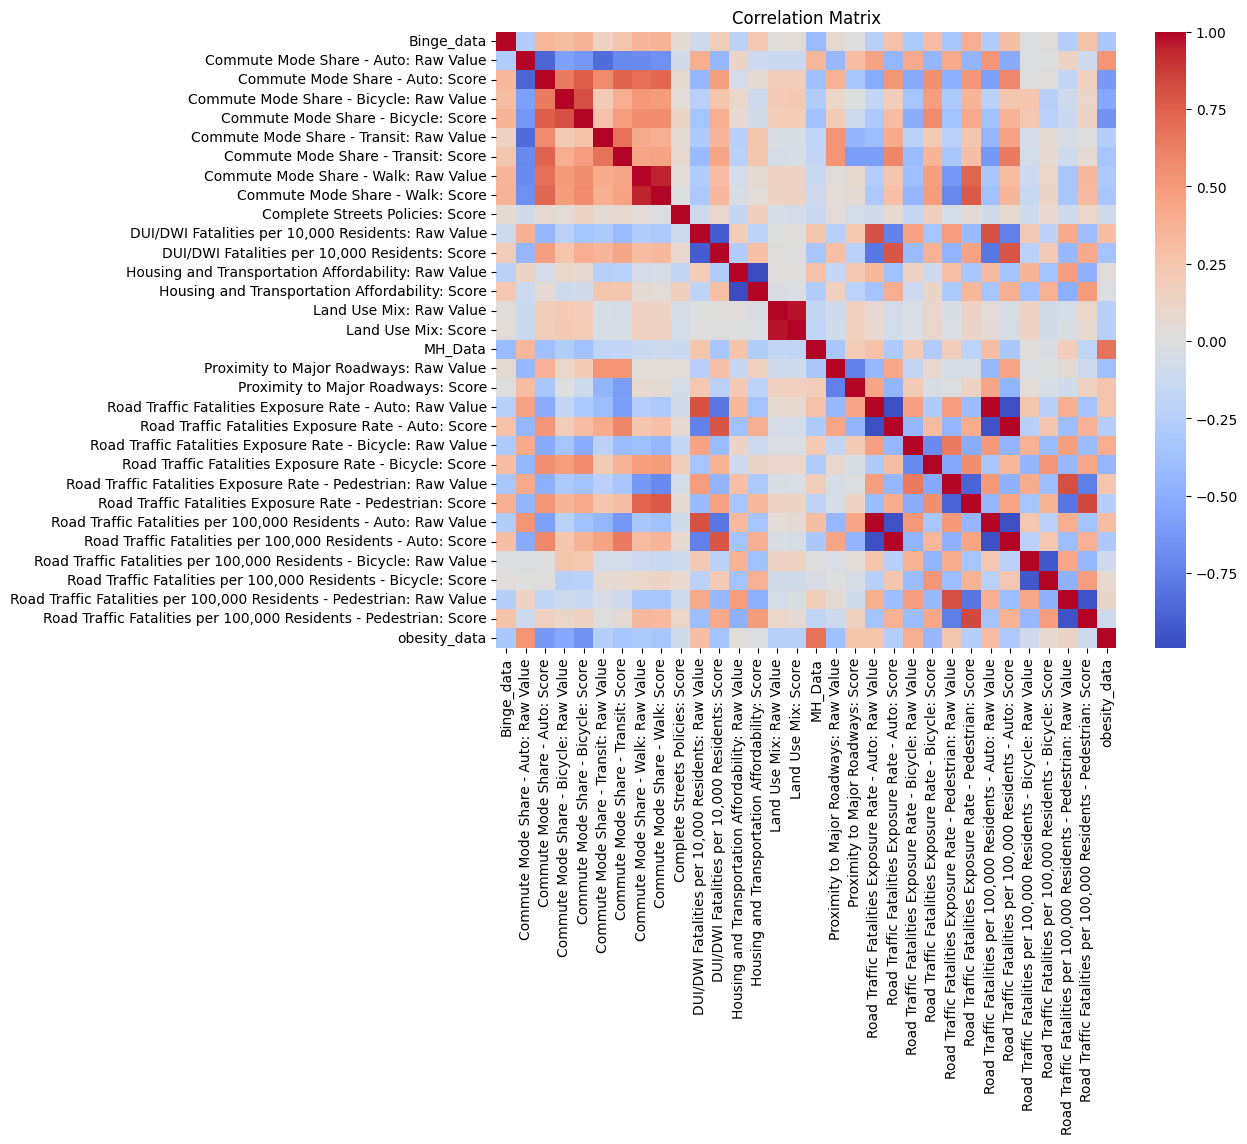

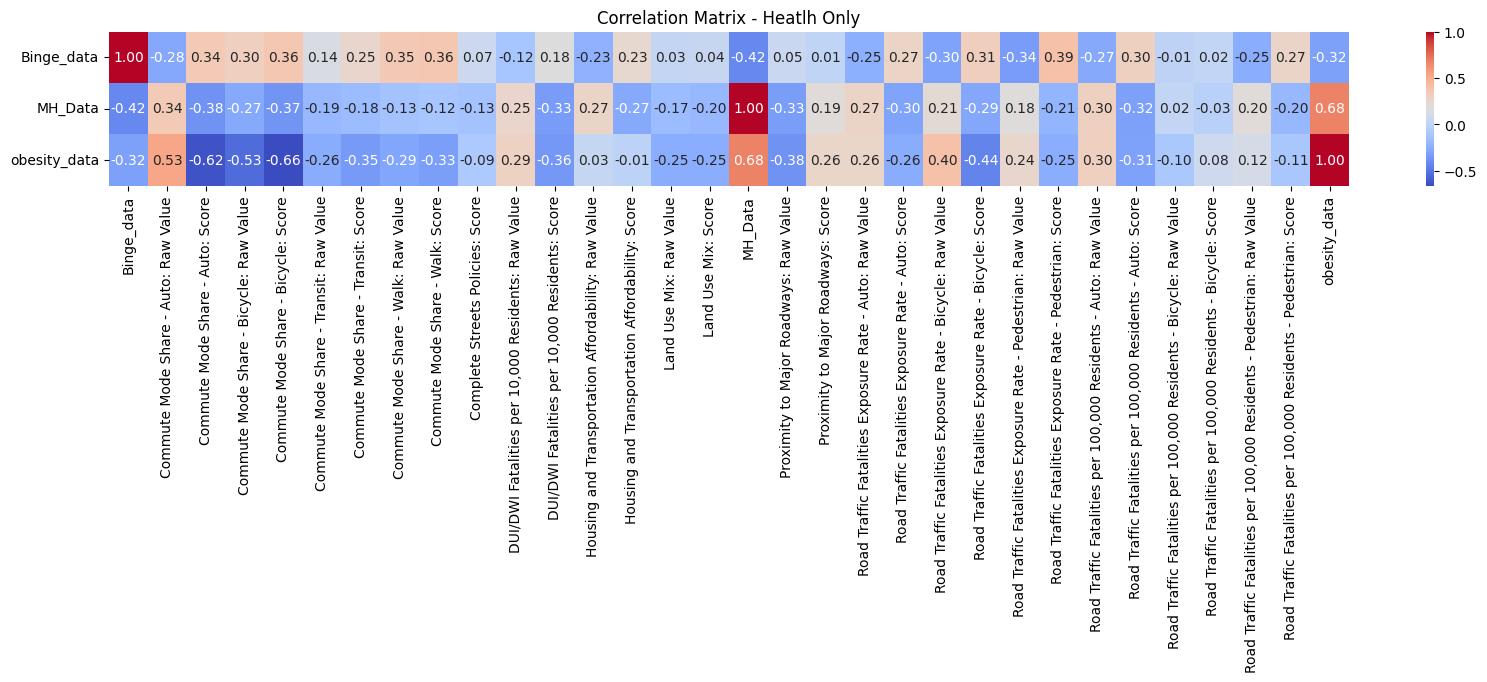

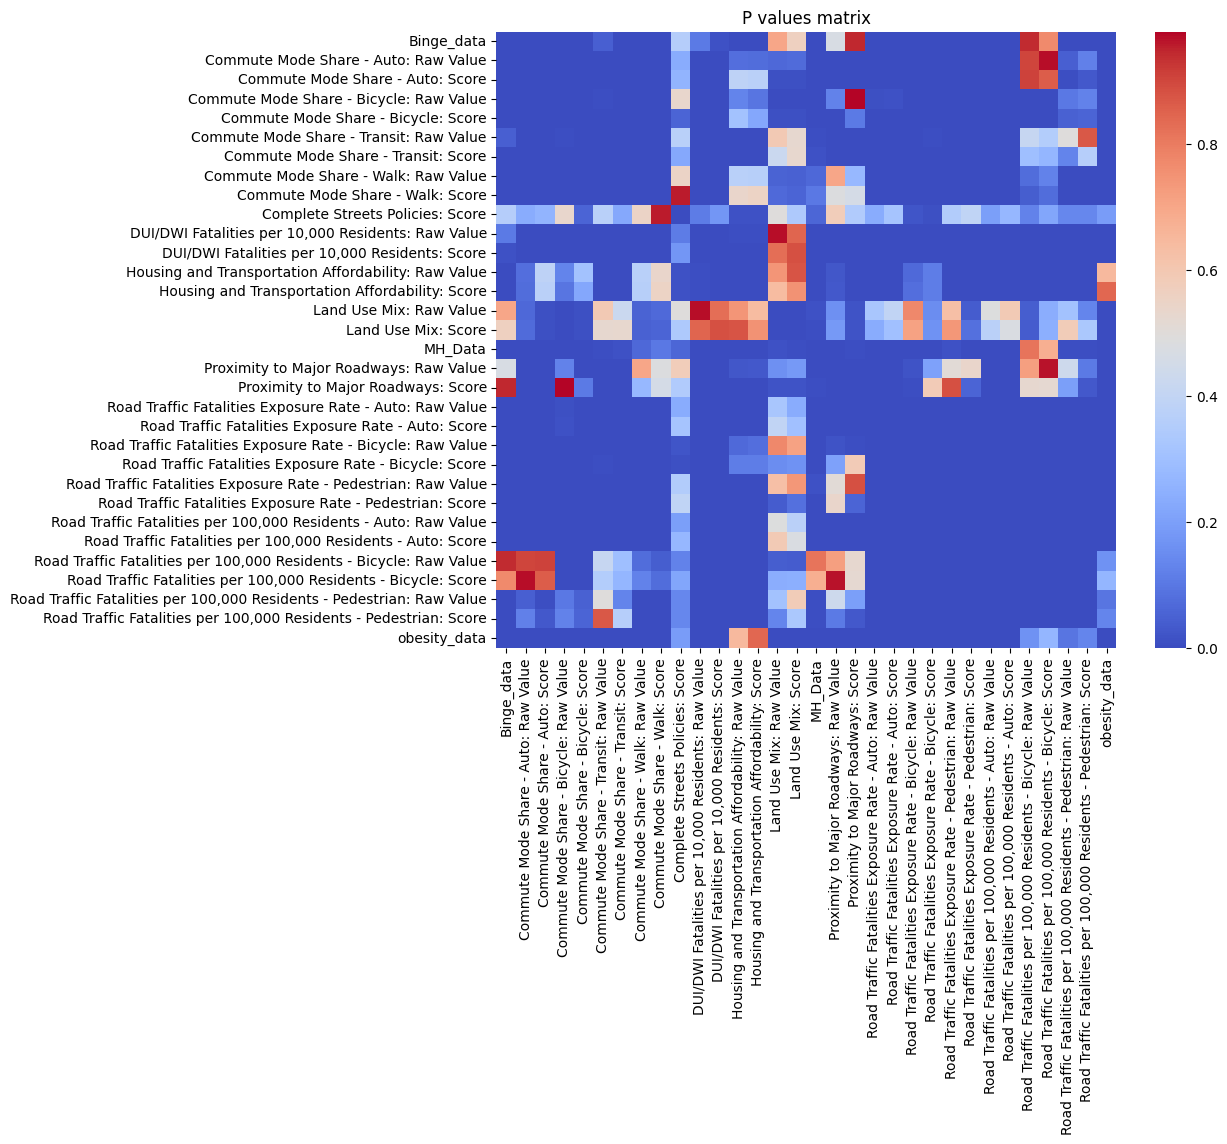

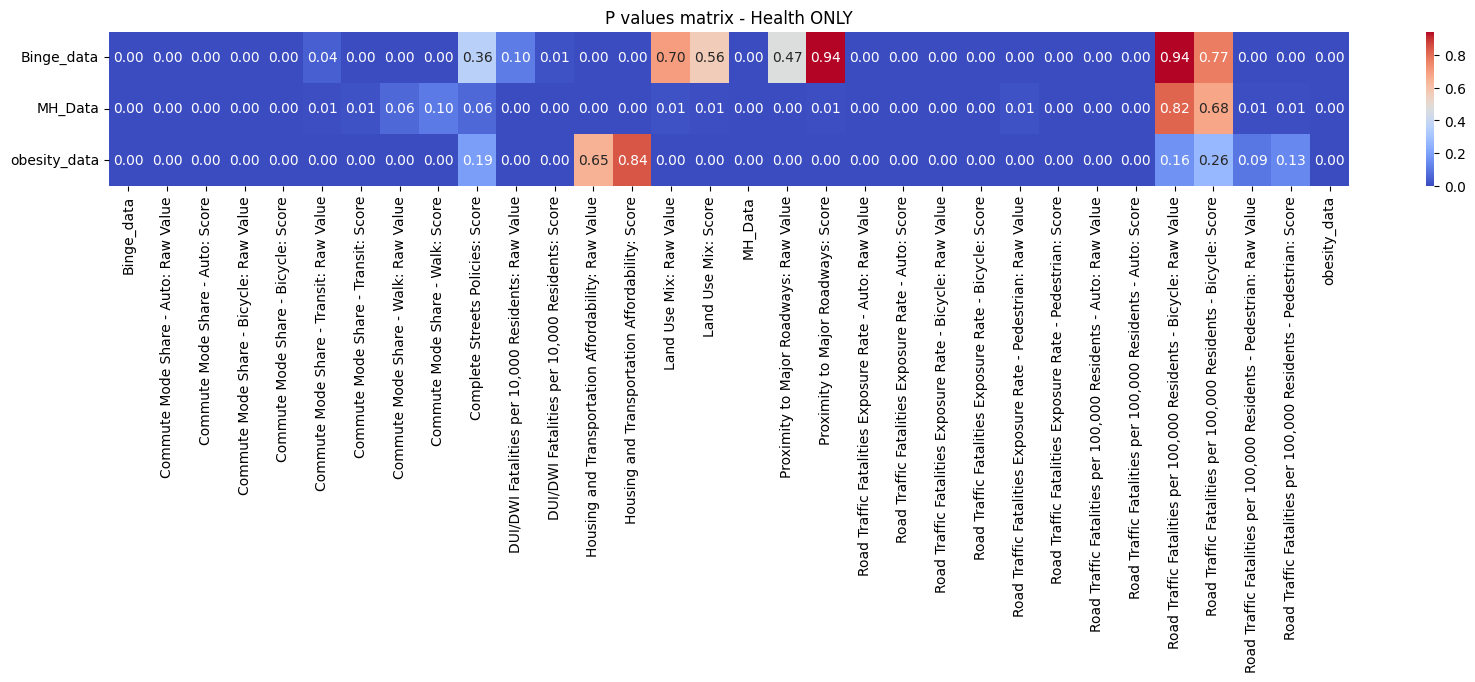

In [18]:
## CORRELATION AND P VALUES

# P value caluclation
def calc_p_values(df):
    pvalues = pd.DataFrame(index=df.columns, columns=df.columns)
    for i in df.columns:
        for j in df.columns:
            corr, pval = pearsonr(df[i], df[j])
            pvalues.loc[i, j] = pval
    return pvalues

# remove irrelevant columns
corr_df = THT_df.drop(['Metropolitan Statistical Area', 'Lat', 'Long', 'Complete Streets Policies: Raw Value'], axis=1)

# calculate correlation coeff
correlation_matrix = corr_df.corr(method='pearson')

# p values
pvalues_matrix = calc_p_values(corr_df)
pvalues_matrix = pvalues_matrix.astype(float, errors='ignore')

# Plot Full correlation matrix
plt.figure(figsize=(10,8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".5f")
plt.title("Correlation Matrix")
plt.show()

# Only Heatlh Rows - correlation coeff
plt.figure(figsize=(20,2))  # Adjust the figure size as needed
health_rows = ['Binge_data', 'MH_Data', 'obesity_data']
selected_rows = correlation_matrix.loc[health_rows]
sns.heatmap(selected_rows, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Heatlh Only")
plt.show()

# plot p values matrix
plt.figure(figsize=(10,8))  # Adjust the figure size as needed
sns.heatmap(pvalues_matrix, annot=False, cmap='coolwarm', fmt=".5f")
plt.title("P values matrix")
plt.show()

# Only Heatlh Rows - p values
plt.figure(figsize=(20,2))  # Adjust the figure size as needed
health_rows = ['Binge_data', 'MH_Data', 'obesity_data']
selected_rows = pvalues_matrix.loc[health_rows]
sns.heatmap(selected_rows, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("P values matrix - Health ONLY")
plt.show()


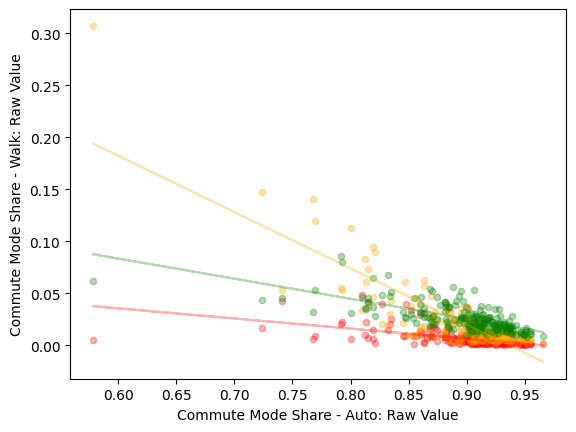

In [ ]:
## Auto vs non auto mode share correlations

values = ['Commute Mode Share - Bicycle: Raw Value', 'Commute Mode Share - Transit: Raw Value', 'Commute Mode Share - Walk: Raw Value']
colors = ['red', 'orange', 'green']

ax = THT_df.plot.scatter([], [])


for (value, c) in zip(values, colors):
    THT_df.plot.scatter(x = "Commute Mode Share - Auto: Raw Value", y = value, ax=ax, color = c, alpha=.3)
    m, b = np.polyfit(THT_df['Commute Mode Share - Auto: Raw Value'], THT_df[value], 1)
    plt.plot(THT_df["Commute Mode Share - Auto: Raw Value"], m*THT_df["Commute Mode Share - Auto: Raw Value"] + b, color = c, alpha = .3)

# plt.legend()
plt.show()


0.49711681662241125
0.41174059926087314


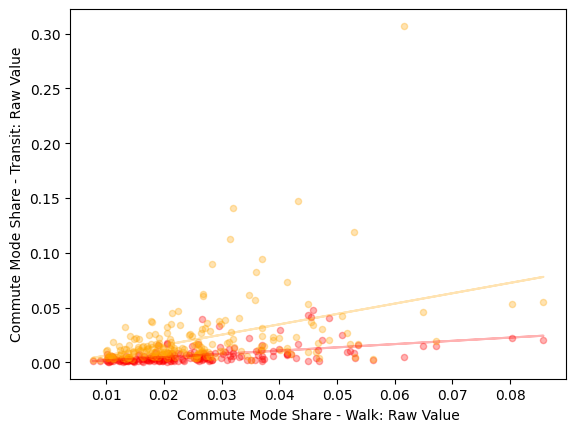

In [ ]:
# non auto correlations

values = ['Commute Mode Share - Bicycle: Raw Value', 'Commute Mode Share - Transit: Raw Value']
colors = ['red', 'orange']

ax = THT_df.plot.scatter([], [])


for (value, c) in zip(values, colors):
    THT_df.plot.scatter(x = "Commute Mode Share - Walk: Raw Value", y = value, ax=ax, color = c, alpha=.3)
    m, b = np.polyfit(THT_df['Commute Mode Share - Walk: Raw Value'], THT_df[value], 1)
    plt.plot(THT_df['Commute Mode Share - Walk: Raw Value'], m*THT_df['Commute Mode Share - Walk: Raw Value'] + b, color = c, alpha = .3)
    print(correlation_matrix.loc['Commute Mode Share - Walk: Raw Value', value])

# plt.legend()
plt.show()

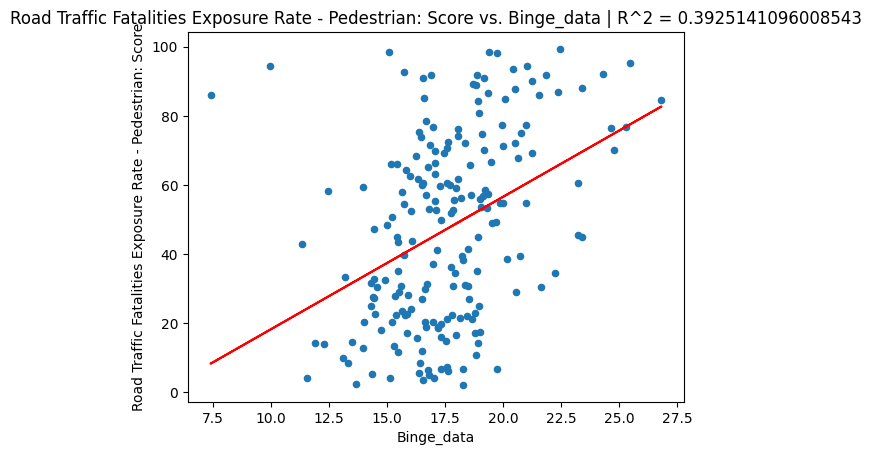

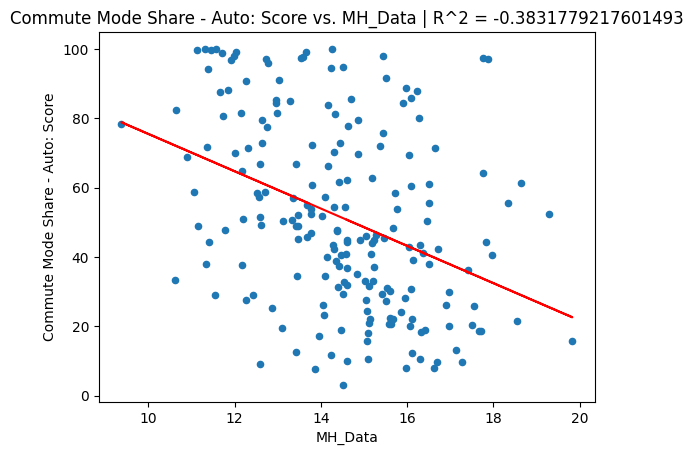

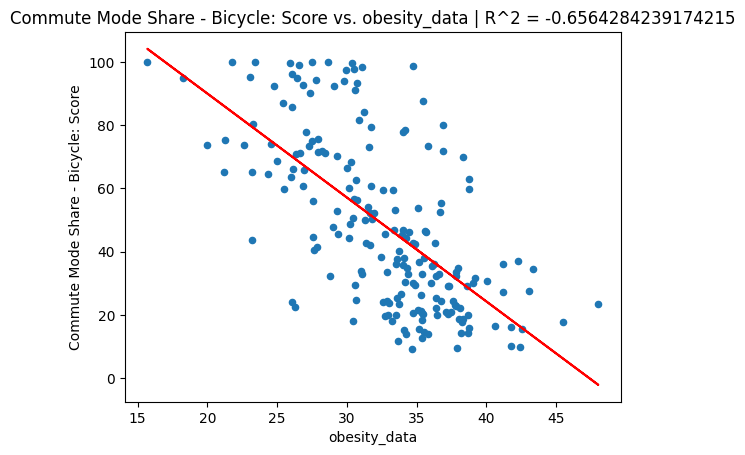

In [ ]:
# Health metric correlations

healths = ['Binge_data', 'MH_Data', 'obesity_data']
transportations = ['Road Traffic Fatalities Exposure Rate - Pedestrian: Score', 'Commute Mode Share - Auto: Score', 'Commute Mode Share - Bicycle: Score']

for (health, transportation) in zip(healths, transportations):
    ax = THT_df.plot.scatter(x = health, y = transportation)
    m, b = np.polyfit(THT_df[health], THT_df[transportation], 1)
    plt.plot(THT_df[health], m*THT_df[health] + b, color = 'red')
    correlation_value = correlation_matrix.loc[health, transportation]
    plt.title(f'{transportation} vs. {health} | R^2 = {correlation_value}')
    plt.show()


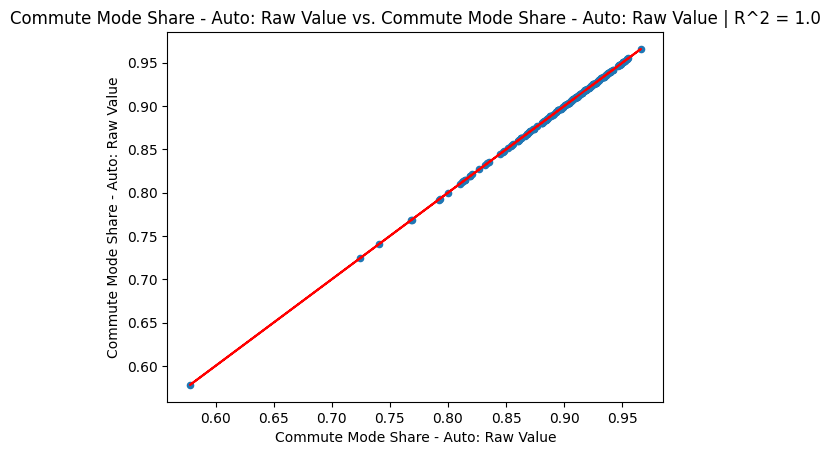

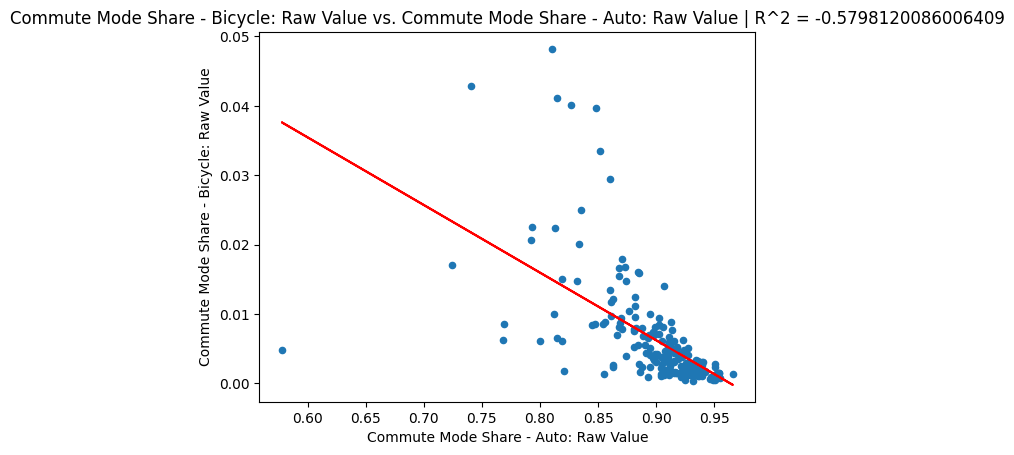

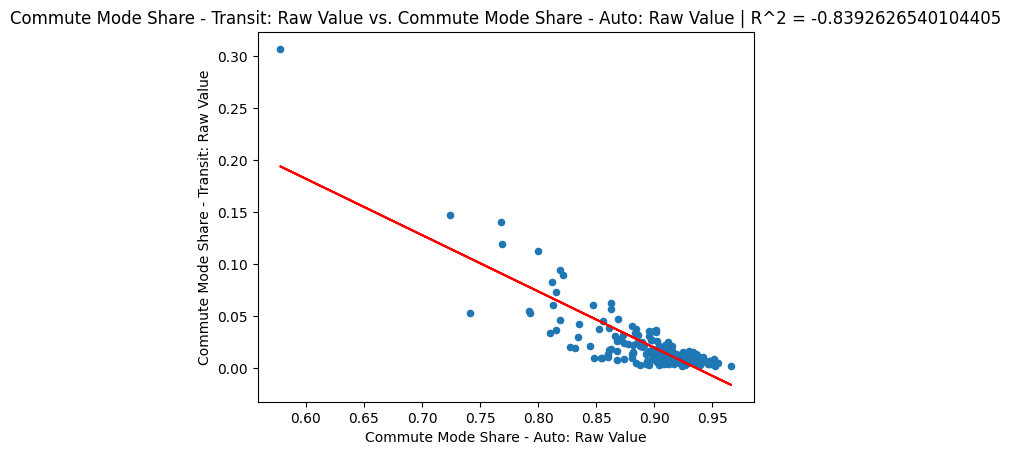

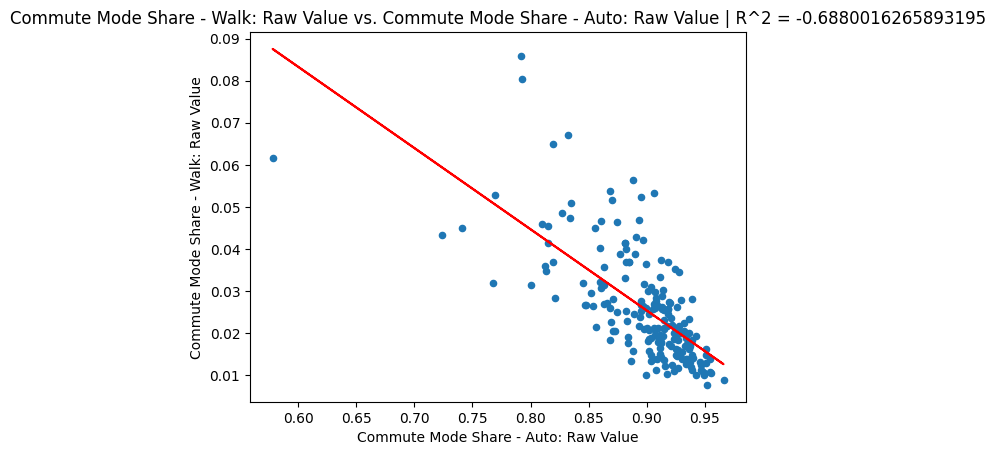

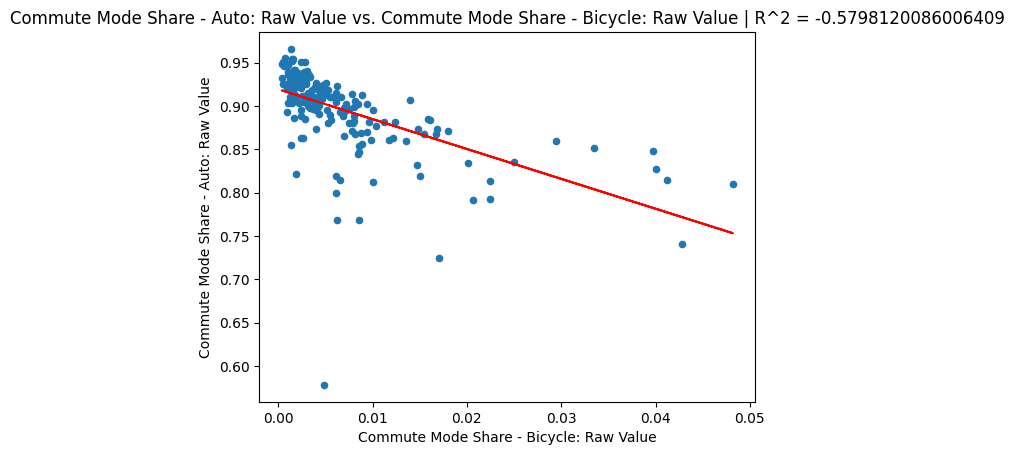

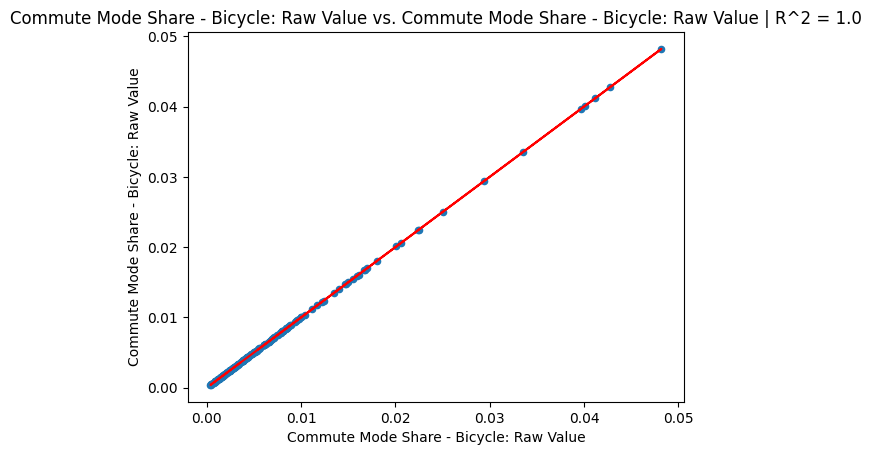

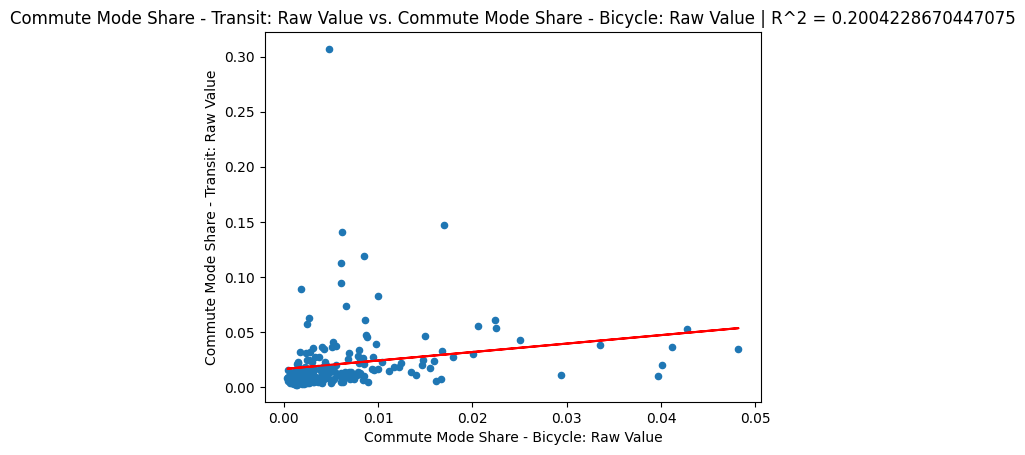

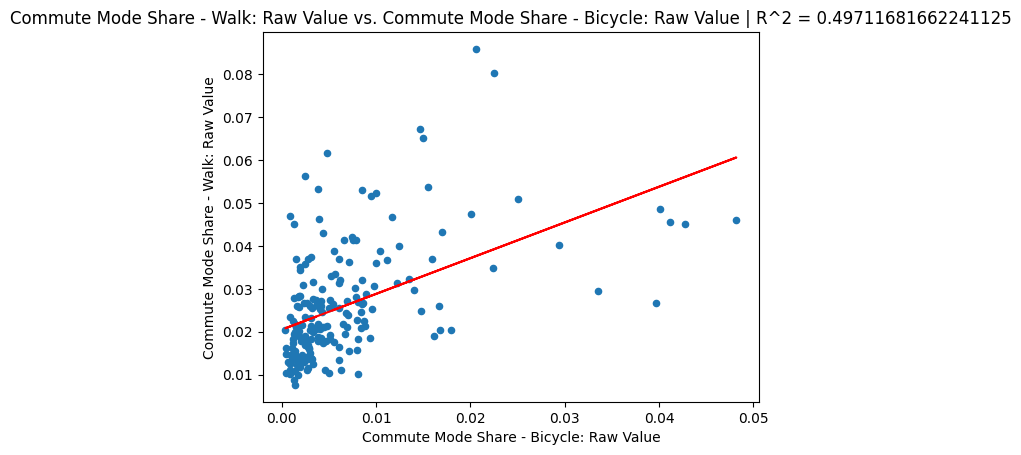

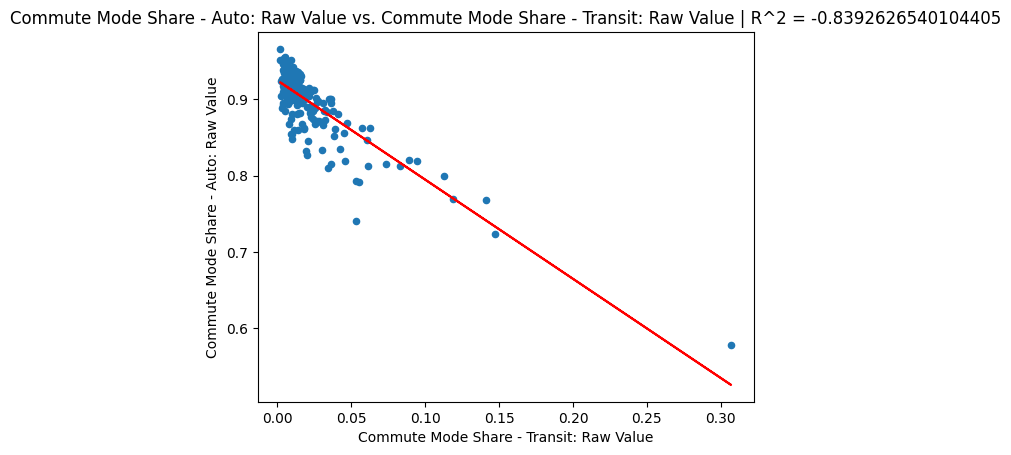

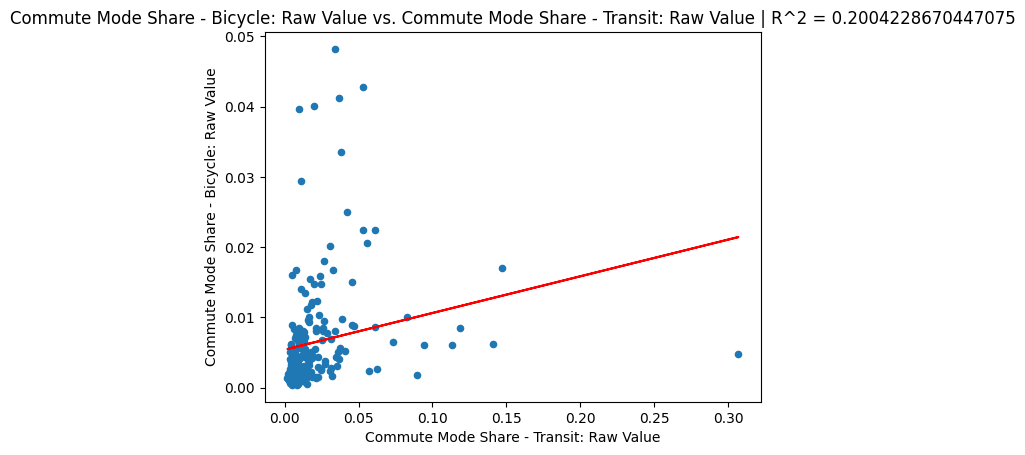

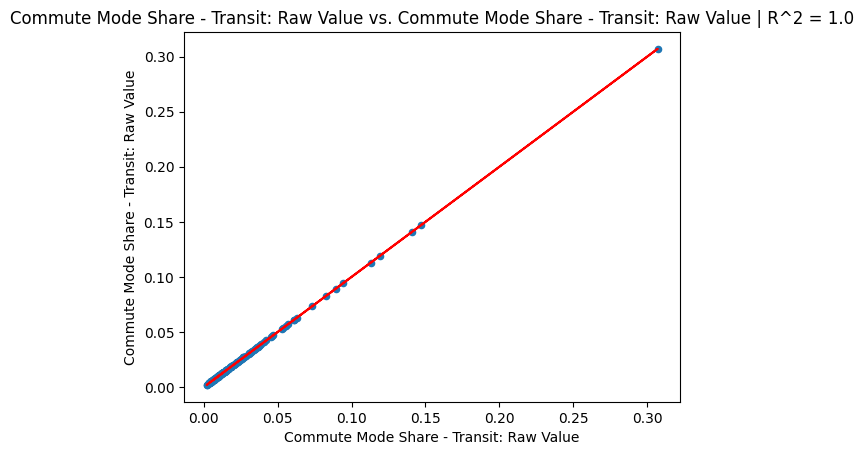

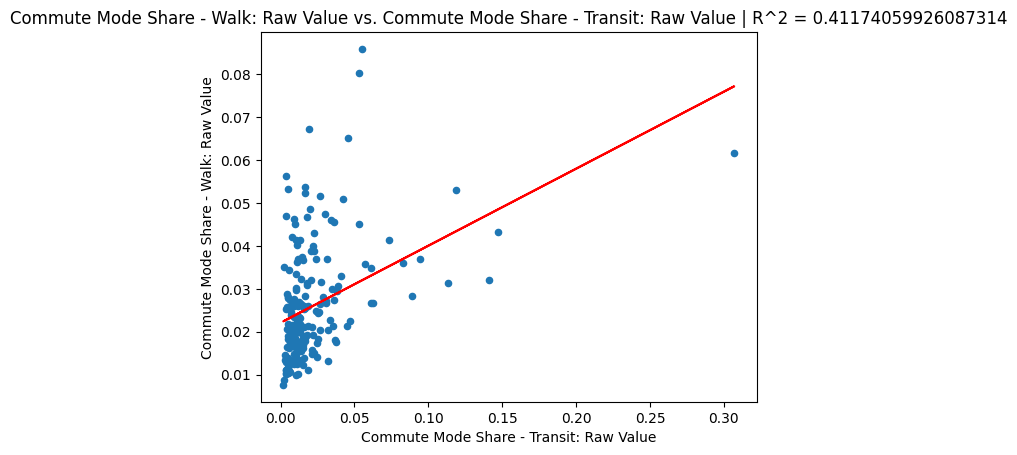

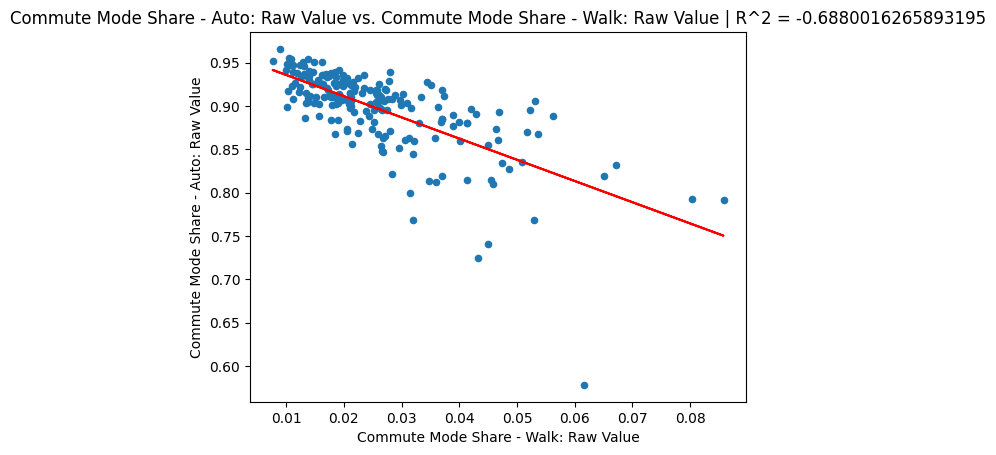

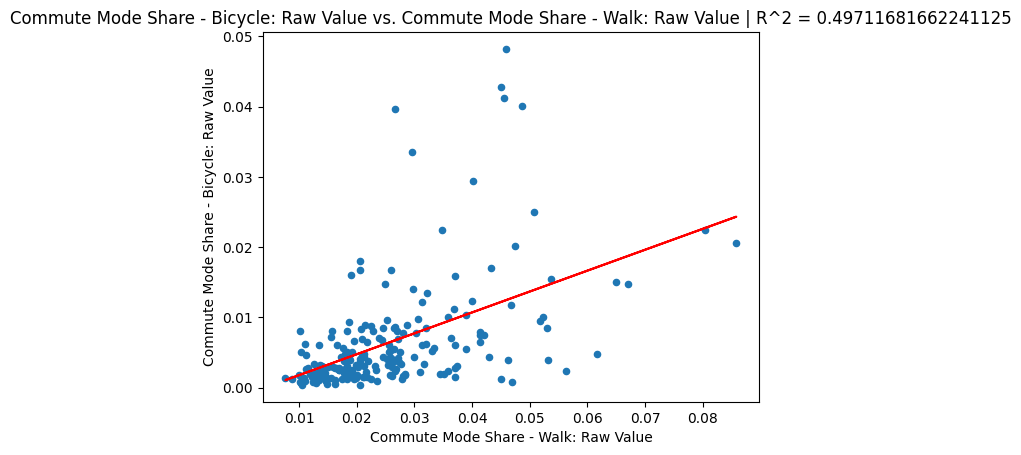

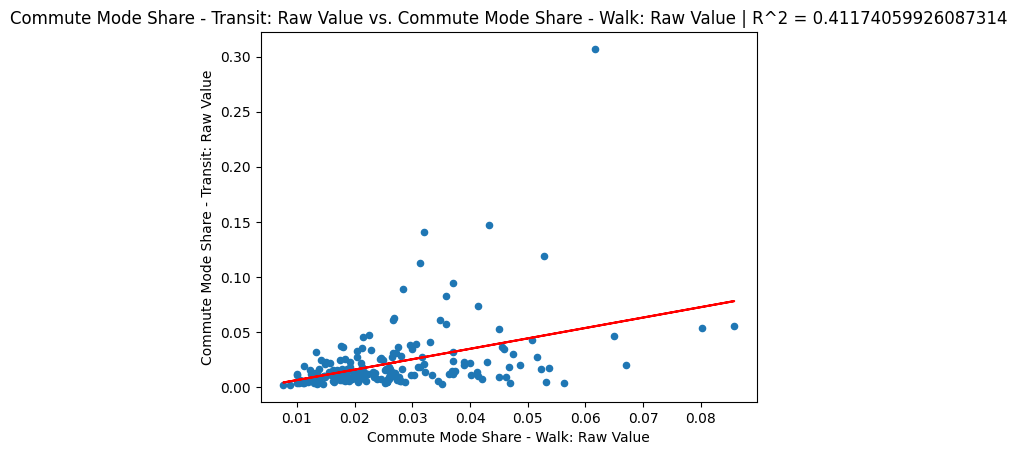

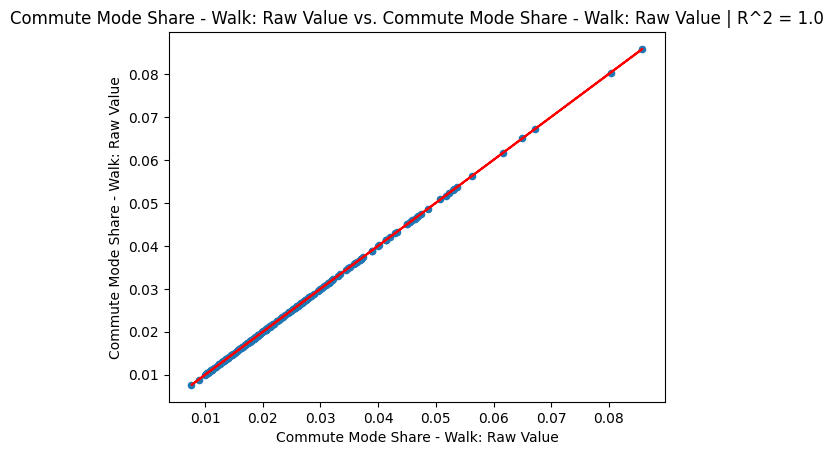

In [ ]:

values = ['Commute Mode Share - Auto: Raw Value', 'Commute Mode Share - Bicycle: Raw Value', 'Commute Mode Share - Transit: Raw Value', 'Commute Mode Share - Walk: Raw Value']
scores = ['Commute Mode Share - Auto: Score', 'Commute Mode Share - Bicycle: Score', 'Commute Mode Share - Transit: Score', 'Commute Mode Share - Walk: Score']

for xaxis in values:
    for yaxis in values:
        ax = THT_df.plot.scatter(x = xaxis, y = yaxis)
        m, b = np.polyfit(THT_df[xaxis], THT_df[yaxis], 1)
        plt.plot(THT_df[xaxis], m*THT_df[xaxis] + b, color = 'red')
        correlation_value = correlation_matrix.loc[xaxis, yaxis]
        plt.title(f'{yaxis} vs. {xaxis} | R^2 = {correlation_value}')
        plt.show()


In [17]:
## KNN Algorithms

## Regression
# How likely are you to be obese?


X = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'obesity_data'], axis=1)  # Features
y = THT_df['obesity_data']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# print(y_pred)
# print(X_test.index)

Mean Squared Error: 17.10
R-squared: 0.40


In [ ]:
## KNN Algorithms

## Regression

# How likely are you to suffer from mental distress?


X4 = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'MH_Data',"Lat",'Long'], axis=1)  # Features
y4 = THT_df['MH_Data']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.83
R-squared: 0.11


In [ ]:
## KNN Algorithms

## Regression

# How likely are you to binge drink?

X4 = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'Binge_data',"Lat",'Long'], axis=1)  # Features
y4 = THT_df['Binge_data']  # Target variable

# MH_Data
# Binge_data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the regressor
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 7.56
R-squared: 0.18


In [ ]:
## Random Forest Algorithms

## Regression
# How likely are you to be obese?


X_rf = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'obesity_data'], axis=1)  # Features
y_rf = THT_df['obesity_data']  # Target variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the KNN regressor
rf_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust 'n_estimators' as needed

# Train the regressor
rf_regressor.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

print(y_pred_rf)
print(X_test_rf.index)

Mean Squared Error: 9.41
R-squared: 0.67
[38.88593603 26.3457289  33.11964269 33.30741819 23.07481681 35.10646667
 34.46772193 39.02236482 35.6403043  34.84904049 26.32588212 30.956943
 31.2049267  28.63680144 38.03075315 33.93190774 35.28760917 31.39476278
 34.92133731 34.77106312 28.24035458 32.32893252 38.94988858 37.16397425
 34.94074511 32.83725346 26.77847713 27.33218624 35.66297139 32.87934318
 33.33912746 34.2444287  32.46502097 34.82952242 27.48085114 34.34883143
 32.81497973 35.85053627 27.65242903 28.44846977]
Int64Index([ 65, 114,  16, 141, 156, 126, 140,  30,  18, 167, 158,  15,  55,
             56, 115,  45, 124,   9, 147,  85, 113, 161,  60, 187,  73,  68,
            119, 163, 117, 175,  69,  76, 125,  82,  24, 191,  96, 171,  19,
            150],
           dtype='int64')


In [ ]:
## Random Forest Algorithms

## Regression

# How likely are you to suffer from mental distress?

X_rf = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'MH_Data'], axis=1)  # Features
y_rf = THT_df['MH_Data']  # Target variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the KNN regressor
rf_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust 'n_estimators' as needed

# Train the regressor
rf_regressor.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.40
R-squared: 0.56


In [ ]:
## Random Forest Algorithms

## Regression

# How likely are you to binge drink?

X_rf = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Raw Value', 'Binge_data'], axis=1)  # Features
y_rf = THT_df['Binge_data']  # Target variable

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the KNN regressor
rf_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust 'n_estimators' as needed

# Train the regressor
rf_regressor.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_rf)

# Evaluate the model
mse = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.42
R-squared: 0.41


In [15]:
#Naive Bayes Classifier: All Variables

X_nb = THT_df.drop(['Metropolitan Statistical Area', 'Complete Streets Policies: Score','Complete Streets Policies: Raw Value'], axis=1)  # Features
X_nb2 = THT_df[['Commute Mode Share - Bicycle: Score','Commute Mode Share - Bicycle: Raw Value']] #only bicycle features

y_nb = THT_df['Complete Streets Policies: Score']  # Target variable


# Split the data into training and testing sets
# using the same train splits as K-Nearest Neighbors above

X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_nb2, y_nb, test_size=0.2, random_state=42)


#naive bayes classification, using a gaussian model
gnb = GaussianNB()

gnb.fit(X_train, y_train)


y_pred_gnb = gnb.predict(X_test)


ac = accuracy_score(y_test,y_pred_gnb)

print ("Accuracy with All Variables Gaussian NB: ",ac)


Accuracy with All Variables Gaussian NB:  0.475


In [16]:
#Naive Bayes Classifier: Bicycle Variables


X_nb2 = THT_df[['Commute Mode Share - Bicycle: Score','Commute Mode Share - Bicycle: Raw Value']] #only bicycle features

y_nb = THT_df['Complete Streets Policies: Score']  # Target variable

# Split the data into training and testing sets
# using the same train splits as K-Nearest Neighbors above

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_nb2, y_nb, test_size=0.2, random_state=42)


#naive bayes classification, using a gaussian model
gnb = GaussianNB()


gnb.fit(X_train2, y_train2)

y_pred_gnb2 = gnb.predict(X_test2)

ac_s = accuracy_score(y_test2,y_pred_gnb2)

print ("Accuracy with Bicycle Variables Gaussian NB: ",ac_s)

Accuracy with Bicycle Variables Gaussian NB:  0.85


Text(0.5, 1.0, 'Confusion Matrix – Gaussian')

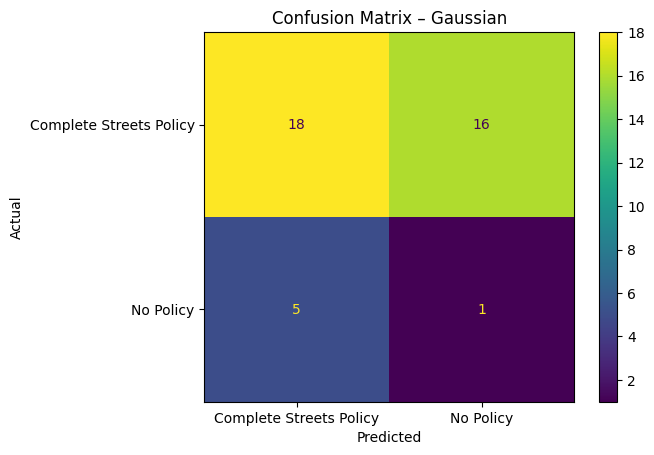

In [13]:
labels = ['Complete Streets Policy', 'No Policy']
cm = confusion_matrix(y_test, y_pred_gnb)
# cm = confusion_matrix(y_test2, y_pred_gnb2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Gaussian')

Text(0.5, 1.0, 'Bicycle Confusion Matrix – Gaussian')

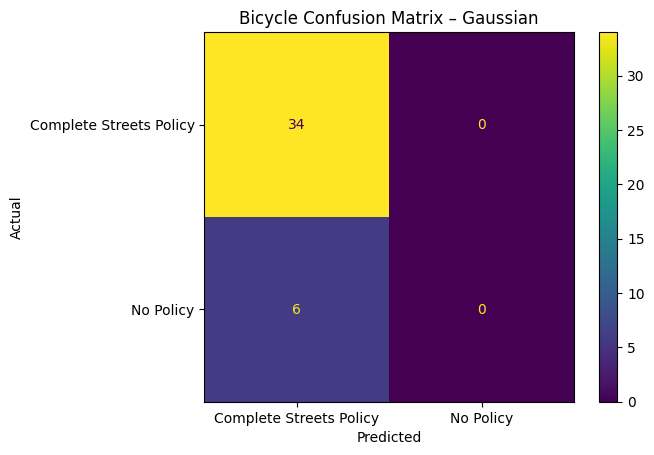

In [14]:
labels = ['Complete Streets Policy', 'No Policy']

cm = confusion_matrix(y_test2, y_pred_gnb2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bicycle Confusion Matrix – Gaussian')